# Clustering Assignment

In [2]:
# Importing Libraries

import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy.cluster import hierarchy
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.neighbors import NearestNeighbors
from sklearn.model_selection import train_test_split
from scipy.cluster.hierarchy import dendrogram, linkage
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 250
sns.set_style('darkgrid')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
# Importing Dataset

df = pd.read_excel(r"C:\Users\shoai\Downloads\Lokesh Assignments (Excel R)\Clustering\EastWestAirlines.xlsx", sheet_name='data')
df

ID#  Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0        1    28143           0          1          1          1          174   
1        2    19244           0          1          1          1          215   
2        3    41354           0          1          1          1         4123   
3        4    14776           0          1          1          1          500   
4        5    97752           0          4          1          1        43300   
...    ...      ...         ...        ...        ...        ...          ...   
3994  4017    18476           0          1          1          1         8525   
3995  4018    64385           0          1          1          1          981   
3996  4019    73597           0          3          1          1        25447   
3997  4020    54899           0          1          1          1          500   
3998  4021     3016           0          1          1          1            0   

      Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  \
0               1                  0                0               7000   
1               2                  0                0               6968   
2               4                  0                0               7034   
3               1                  0                0               6952   
4              26               2077                4               6935   
...           ...                ...              ...                ...   
3994            4                200                1               1403   
3995            5                  0                0               1395   
3996            8                  0                0               1402   
3997            1                500                1               1401   
3998            0                  0                0               1398   

      Award?  
0          0  
1          0  
2          0  
3          0  
4          1  
...      ...  
3994       1  
3995       1  
3996       1  
3997       0  
3998       0  

[3999 rows x 12 columns]

In [4]:
df.describe()

ID#       Balance    Qual_miles    cc1_miles    cc2_miles  \
count  3999.000000  3.999000e+03   3999.000000  3999.000000  3999.000000   
mean   2014.819455  7.360133e+04    144.114529     2.059515     1.014504   
std    1160.764358  1.007757e+05    773.663804     1.376919     0.147650   
min       1.000000  0.000000e+00      0.000000     1.000000     1.000000   
25%    1010.500000  1.852750e+04      0.000000     1.000000     1.000000   
50%    2016.000000  4.309700e+04      0.000000     1.000000     1.000000   
75%    3020.500000  9.240400e+04      0.000000     3.000000     1.000000   
max    4021.000000  1.704838e+06  11148.000000     5.000000     3.000000   

         cc3_miles    Bonus_miles  Bonus_trans  Flight_miles_12mo  \
count  3999.000000    3999.000000   3999.00000        3999.000000   
mean      1.012253   17144.846212     11.60190         460.055764   
std       0.195241   24150.967826      9.60381        1400.209171   
min       1.000000       0.000000      0.00000           0.000000   
25%       1.000000    1250.000000      3.00000           0.000000   
50%       1.000000    7171.000000     12.00000           0.000000   
75%       1.000000   23800.500000     17.00000         311.000000   
max       5.000000  263685.000000     86.00000       30817.000000   

       Flight_trans_12  Days_since_enroll       Award?  
count      3999.000000         3999.00000  3999.000000  
mean          1.373593         4118.55939     0.370343  
std           3.793172         2065.13454     0.482957  
min           0.000000            2.00000     0.000000  
25%           0.000000         2330.00000     0.000000  
50%           0.000000         4096.00000     0.000000  
75%           1.000000         5790.50000     1.000000  
max          53.000000         8296.00000     1.000000

- The columns Balance, Qual_miles, Bonus_miles, Flight_miles_12mo, Days_since_enroll have outliers present in them.
- But, let's confirm it in Scatter plot.

In [6]:
df.isna().sum()

ID#                  0
Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64

In [7]:
df.duplicated().sum()

0

- No missing values present.
- No duplicate values as well.

In [9]:
df.dtypes

ID#                  int64
Balance              int64
Qual_miles           int64
cc1_miles            int64
cc2_miles            int64
cc3_miles            int64
Bonus_miles          int64
Bonus_trans          int64
Flight_miles_12mo    int64
Flight_trans_12      int64
Days_since_enroll    int64
Award?               int64
dtype: object

In [10]:
df.shape

(3999, 12)

# Data Pre-Processing

In [12]:
df.drop(['ID#', 'cc1_miles', 'cc2_miles', 'cc3_miles', 'Qual_miles'], axis=1, inplace=True)

In [13]:
df

Balance  Bonus_miles  Bonus_trans  Flight_miles_12mo  Flight_trans_12  \
0       28143          174            1                  0                0   
1       19244          215            2                  0                0   
2       41354         4123            4                  0                0   
3       14776          500            1                  0                0   
4       97752        43300           26               2077                4   
...       ...          ...          ...                ...              ...   
3994    18476         8525            4                200                1   
3995    64385          981            5                  0                0   
3996    73597        25447            8                  0                0   
3997    54899          500            1                500                1   
3998     3016            0            0                  0                0   

      Days_since_enroll  Award?  
0                  7000       0  
1                  6968       0  
2                  7034       0  
3                  6952       0  
4                  6935       1  
...                 ...     ...  
3994               1403       1  
3995               1395       1  
3996               1402       1  
3997               1401       0  
3998               1398       0  

[3999 rows x 7 columns]

In [14]:
df.rename(columns={'Flight_miles_12mo' : 'F_Miles(12mnth)', 'Flight_trans_12' : 'F_Trans(12mnth)', 'Days_since_enroll' : 'Days_enrolled'}, inplace=True)

In [15]:
df

Balance  Bonus_miles  Bonus_trans  F_Miles(12mnth)  F_Trans(12mnth)  \
0       28143          174            1                0                0   
1       19244          215            2                0                0   
2       41354         4123            4                0                0   
3       14776          500            1                0                0   
4       97752        43300           26             2077                4   
...       ...          ...          ...              ...              ...   
3994    18476         8525            4              200                1   
3995    64385          981            5                0                0   
3996    73597        25447            8                0                0   
3997    54899          500            1              500                1   
3998     3016            0            0                0                0   

      Days_enrolled  Award?  
0              7000       0  
1              6968       0  
2              7034       0  
3              6952       0  
4              6935       1  
...             ...     ...  
3994           1403       1  
3995           1395       1  
3996           1402       1  
3997           1401       0  
3998           1398       0  

[3999 rows x 7 columns]

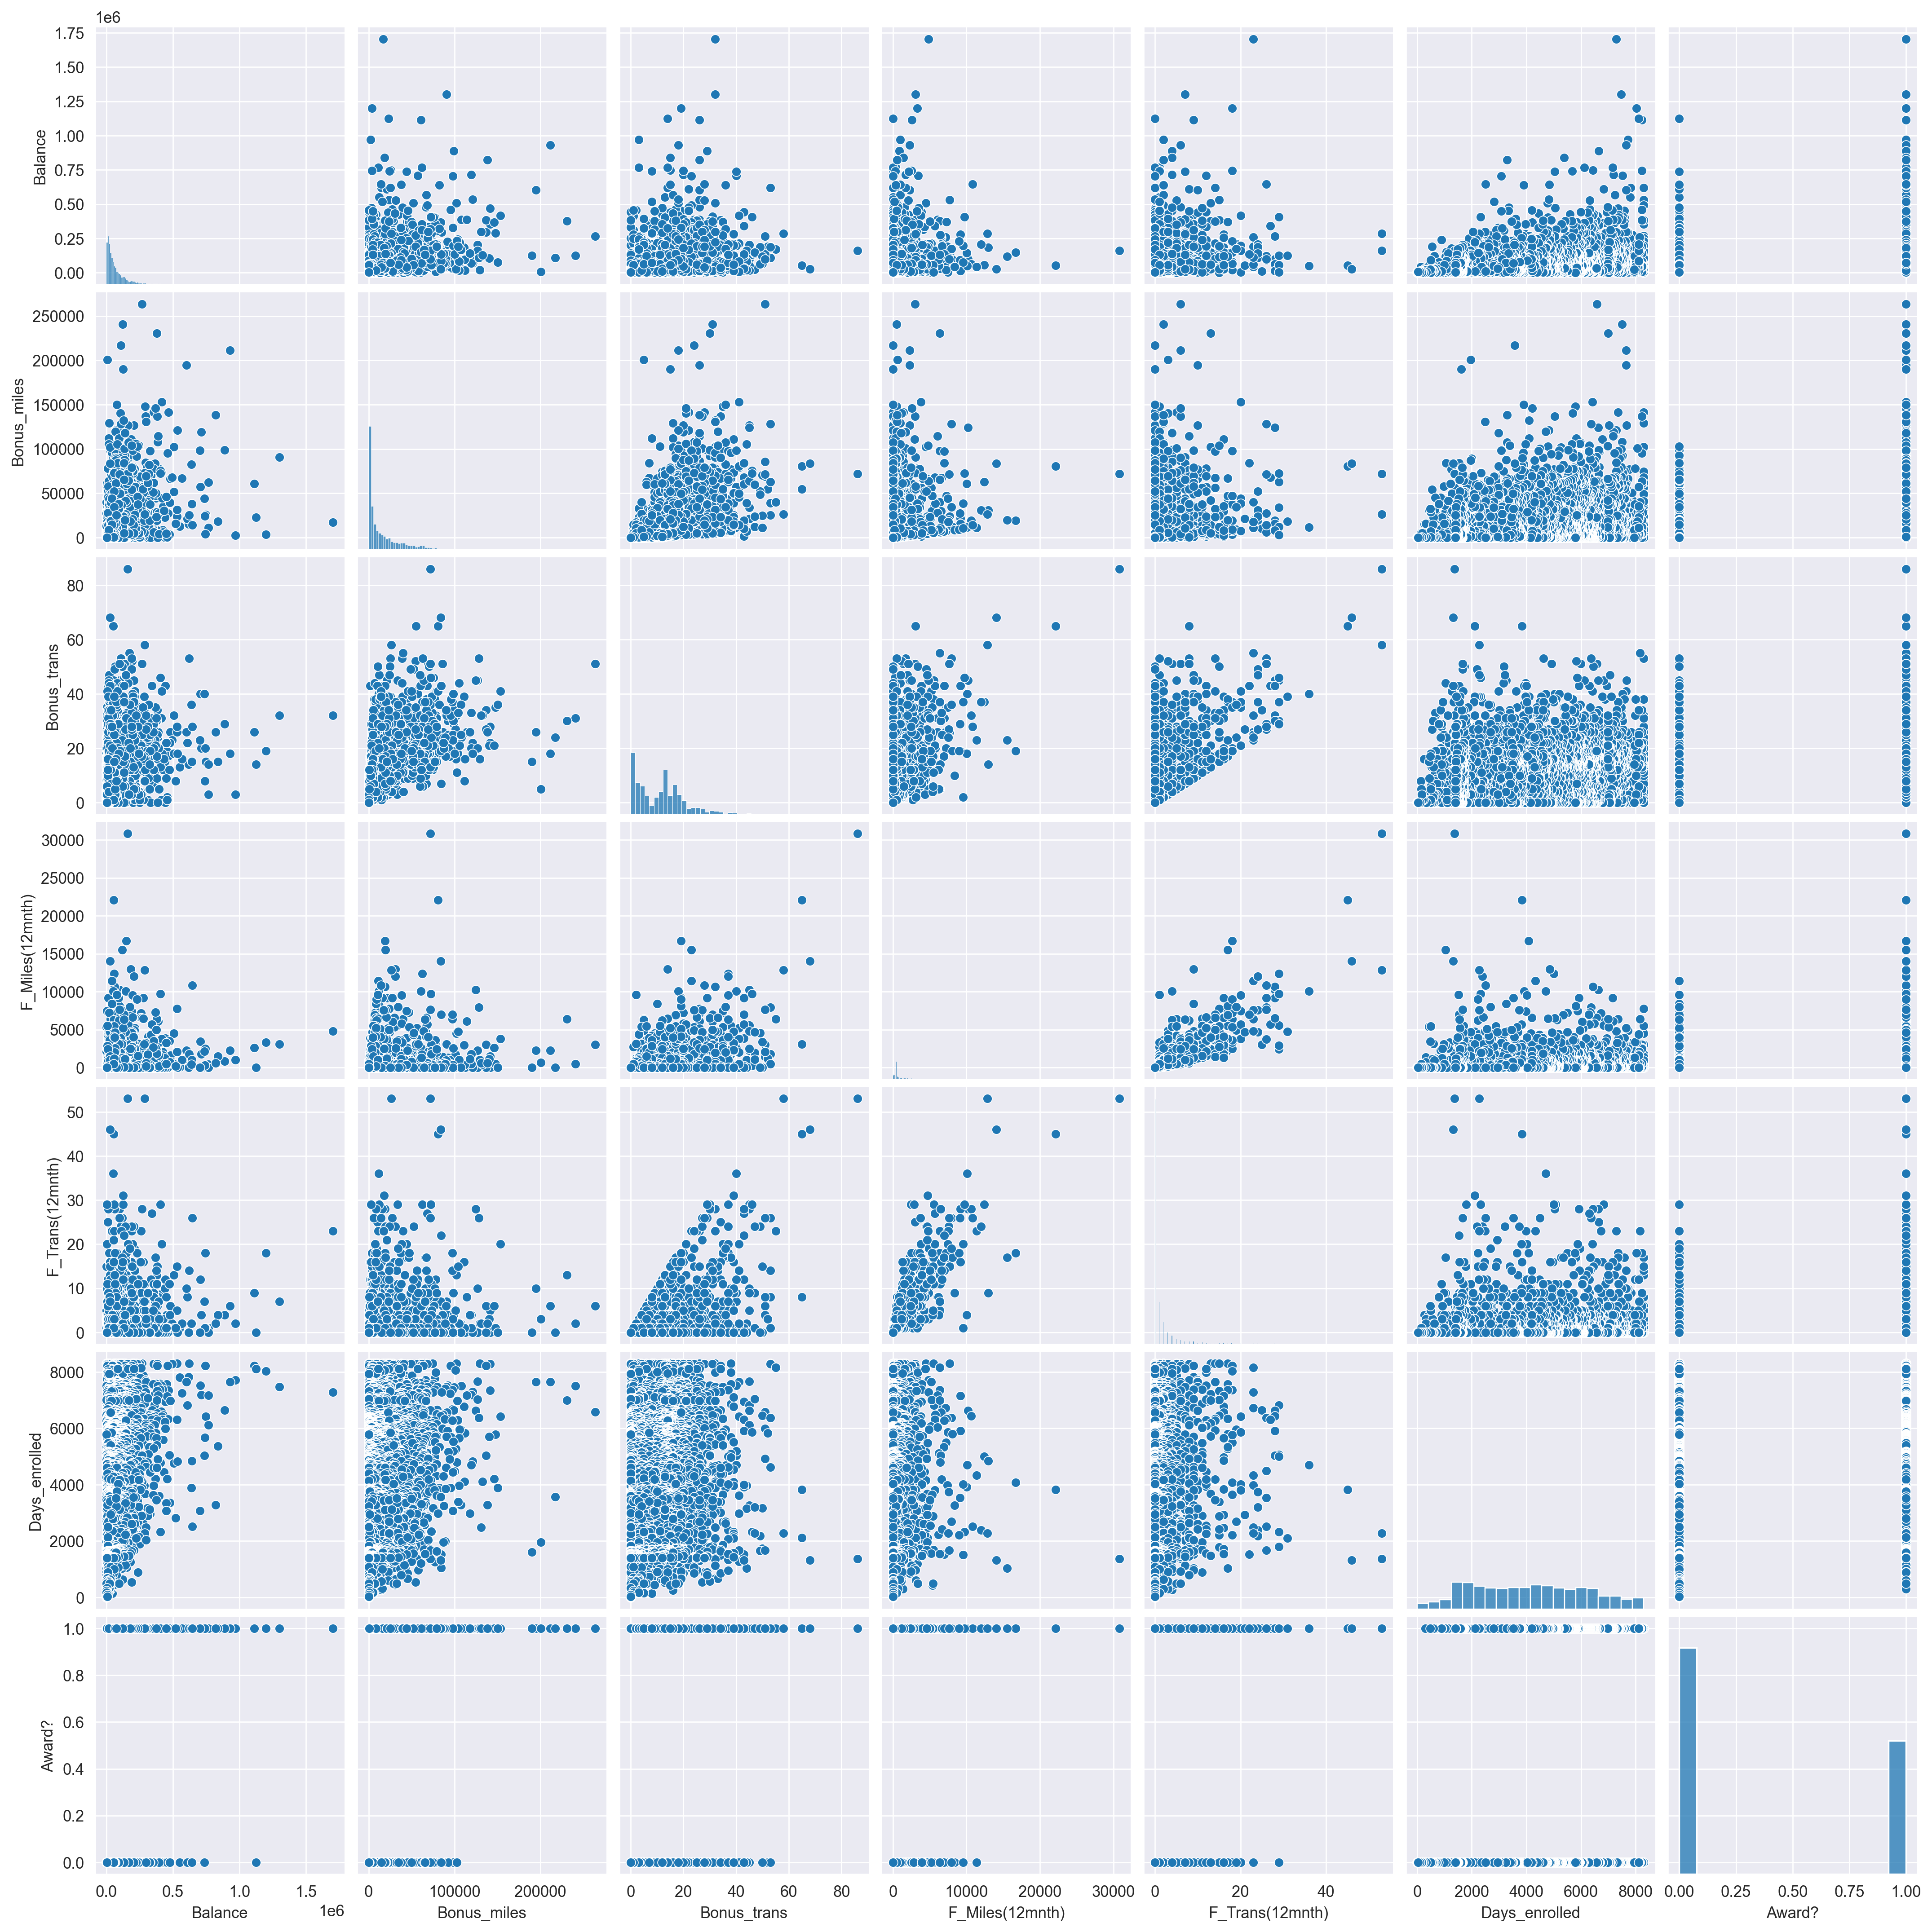

In [16]:
sns.pairplot(df)

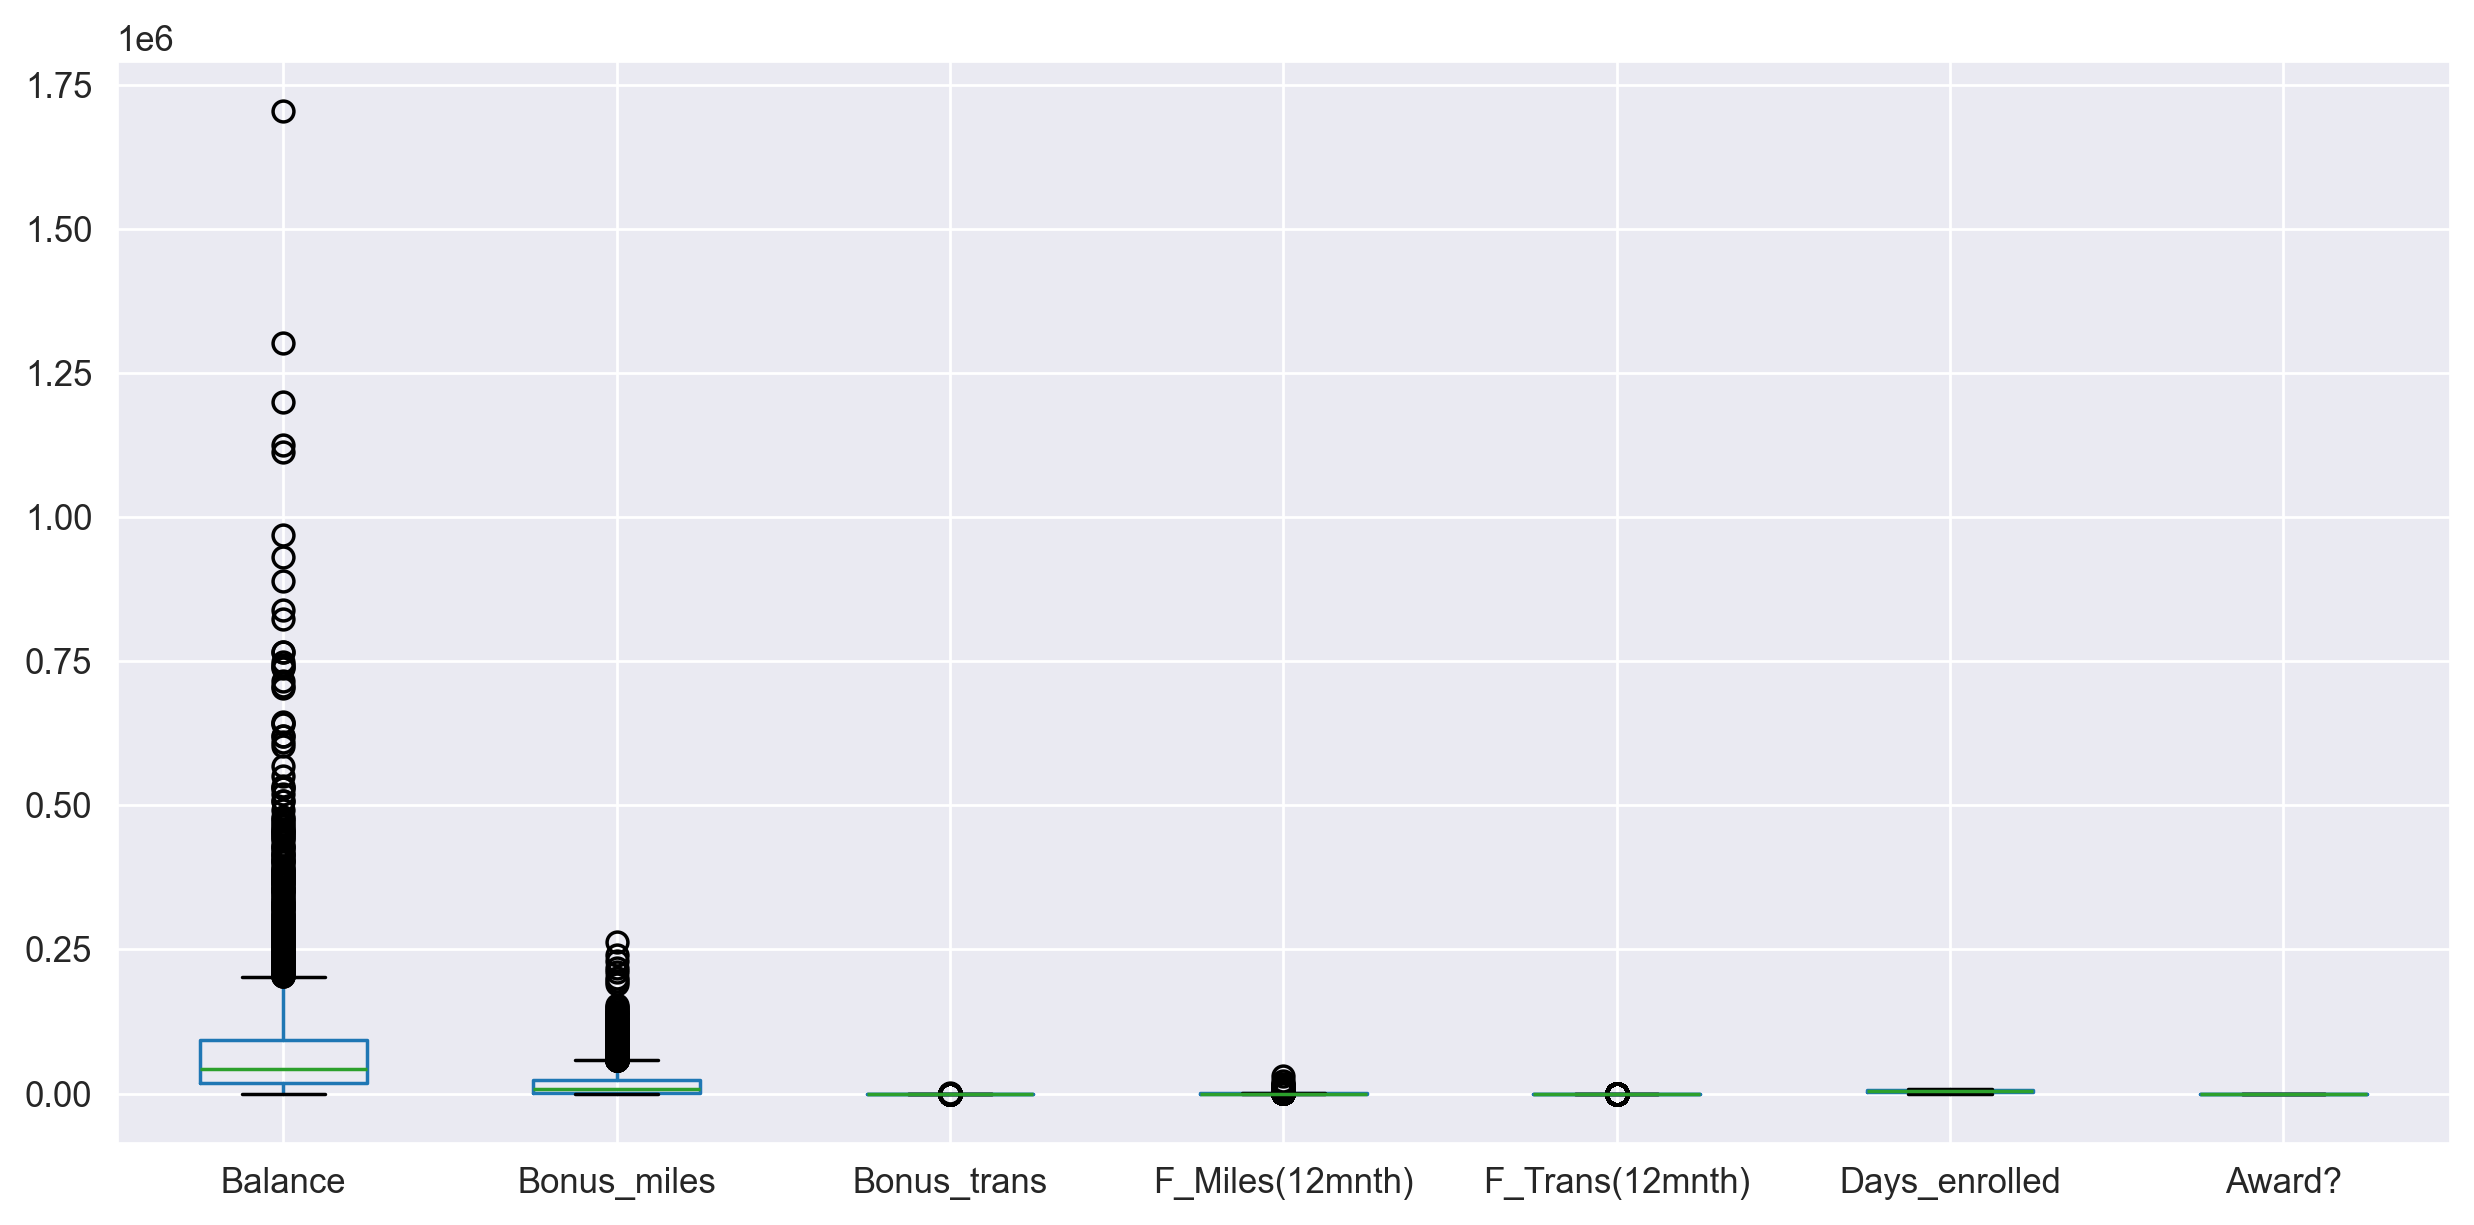

In [17]:
df.boxplot()
plt.tight_layout()

- The columns Balance, Qual_miles, Bonus_miles, F_Miles(12mnth), F_Trans(12mnth), Days_enrolled have outliers.

In [19]:
df.columns

Index(['Balance', 'Bonus_miles', 'Bonus_trans', 'F_Miles(12mnth)',
       'F_Trans(12mnth)', 'Days_enrolled', 'Award?'],
      dtype='object')

In [20]:
# Using capping method to replace outliers

def capping(data, columns):
    for col in columns:
        q1 = data[col].quantile(0.25)
        q3 = data[col].quantile(0.75)
        iqr = q3-q1
    
        lower = q1-(1.5*iqr)
        upper = q3+(1.5*iqr)
        
        df[col] = np.where(df[col] > upper, upper, np.where(df[col] < lower, lower,df[col]))

In [21]:
capping(df, df.columns)

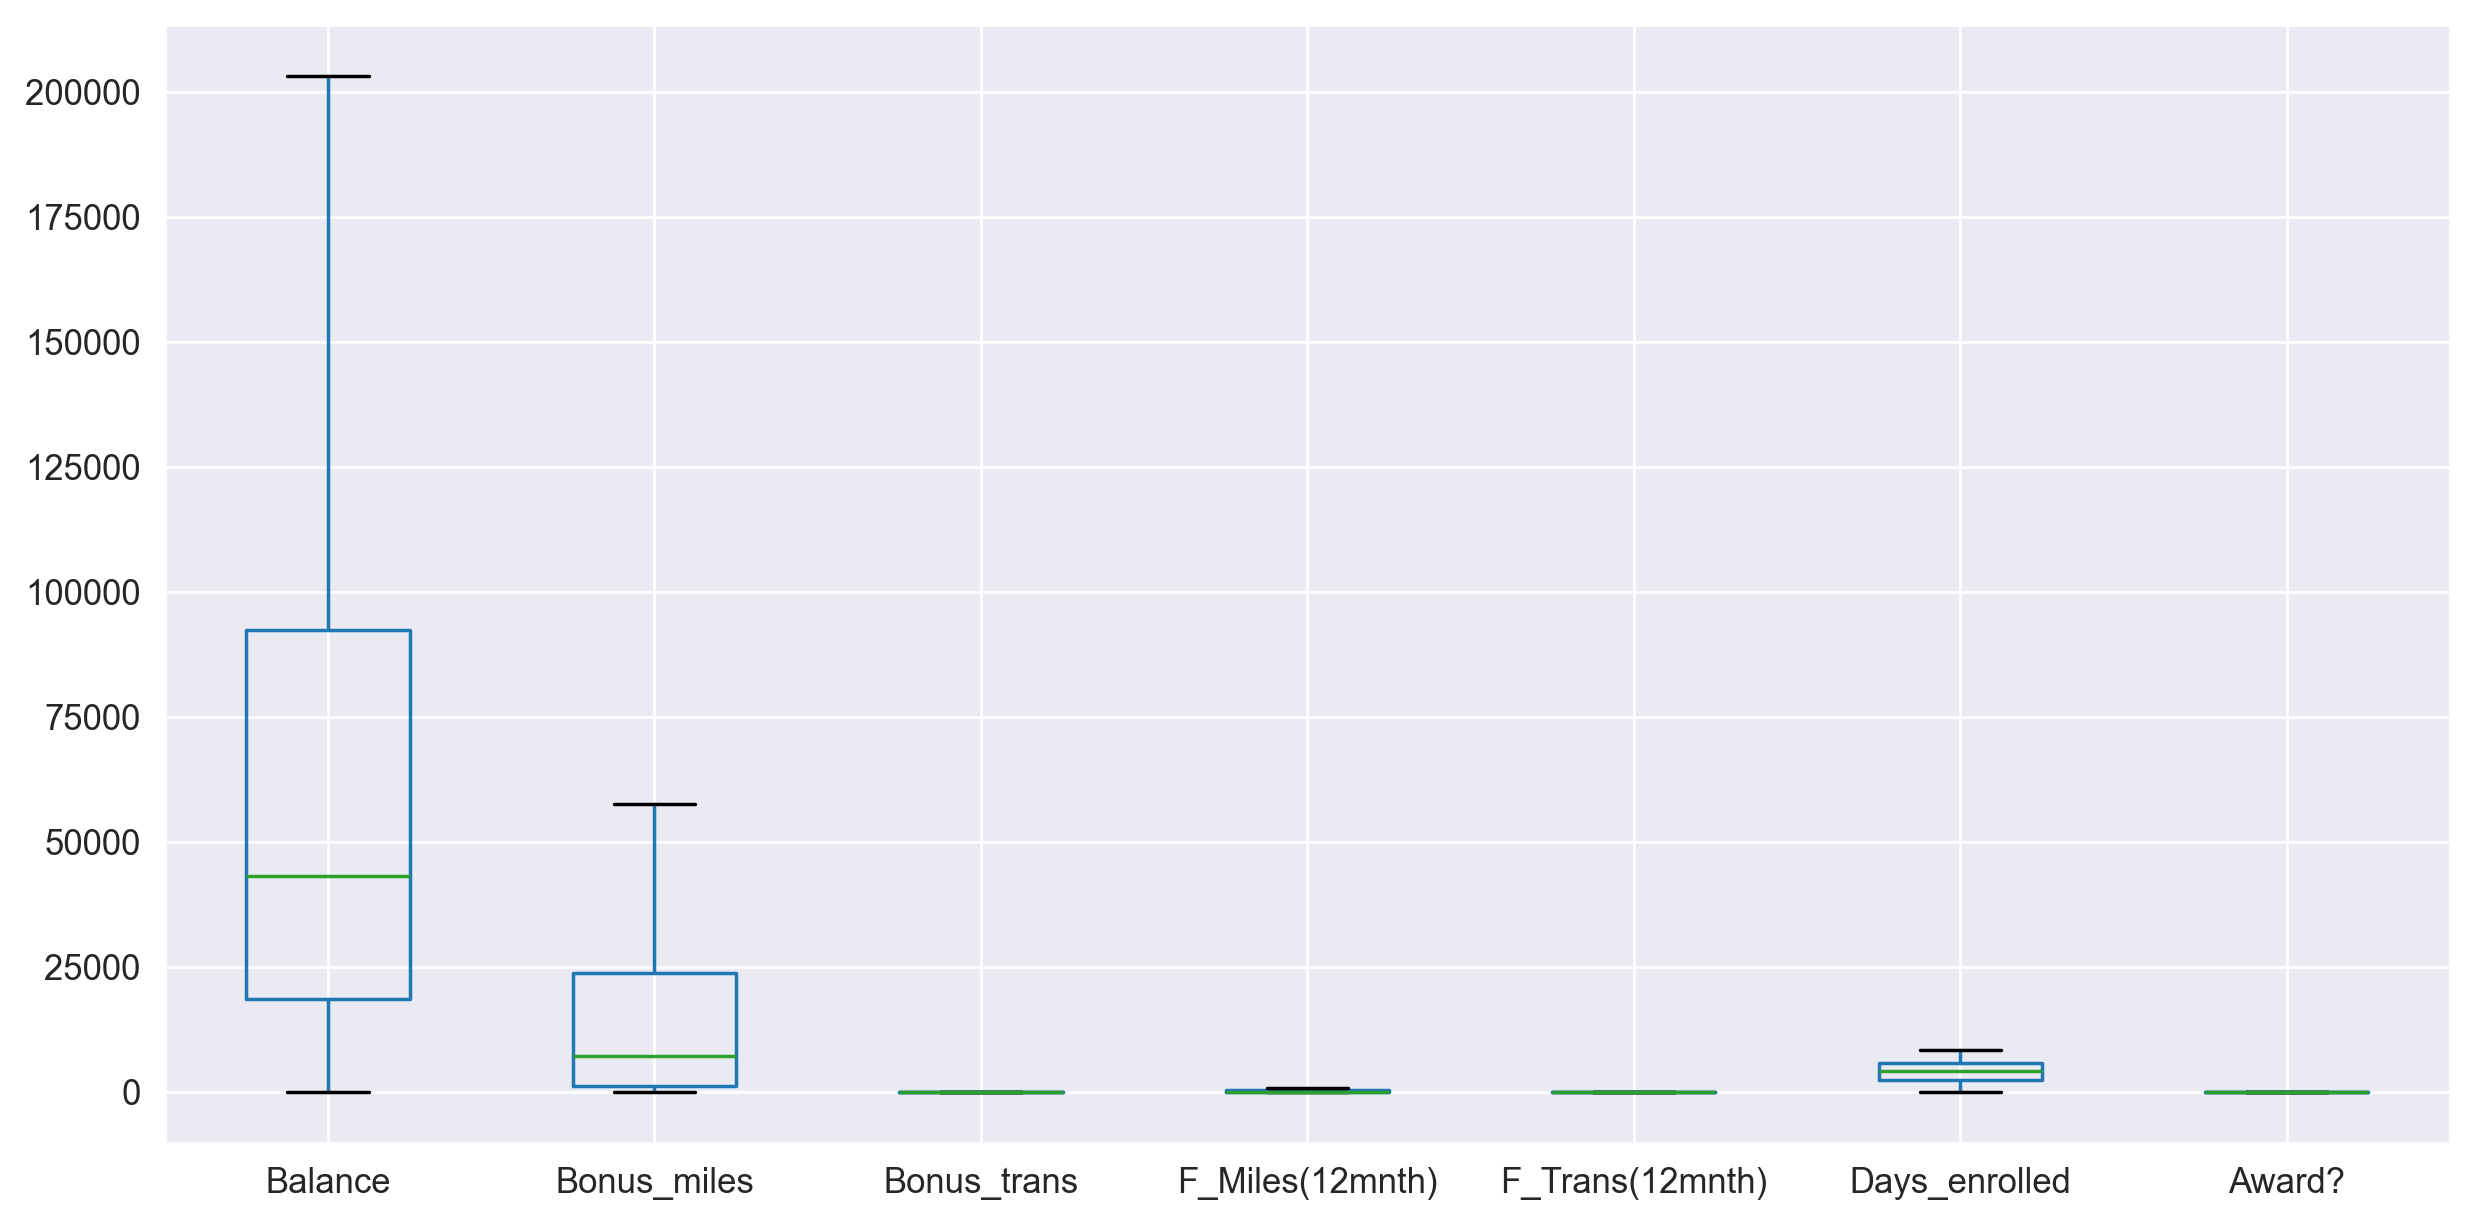

In [22]:
df.boxplot()
plt.tight_layout()

<Axes: >

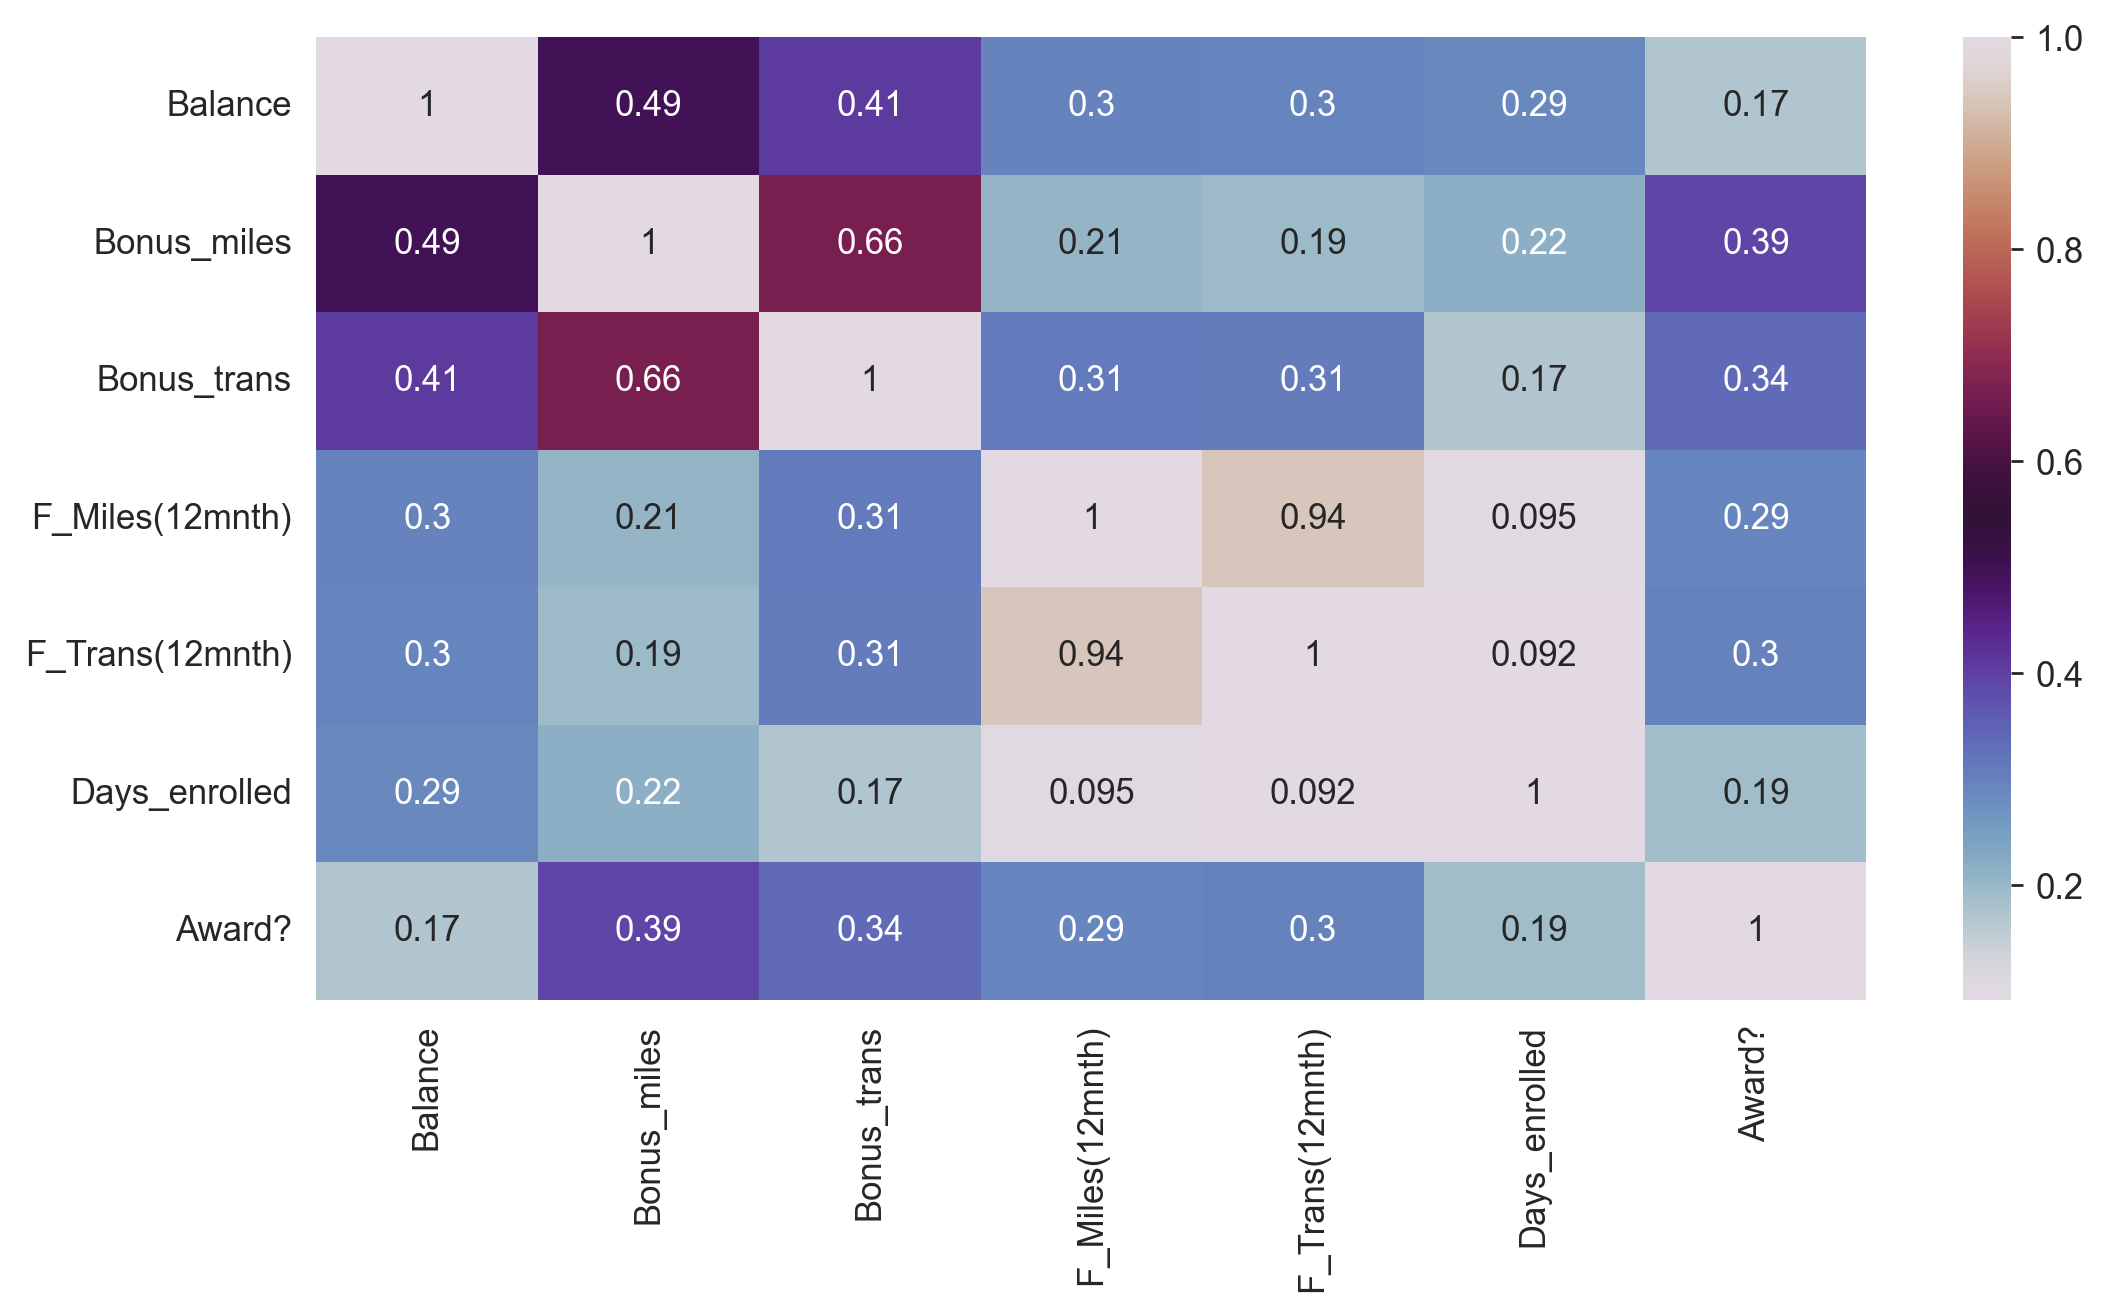

In [23]:
sns.heatmap(df.corr(), annot=True, cmap='twilight')

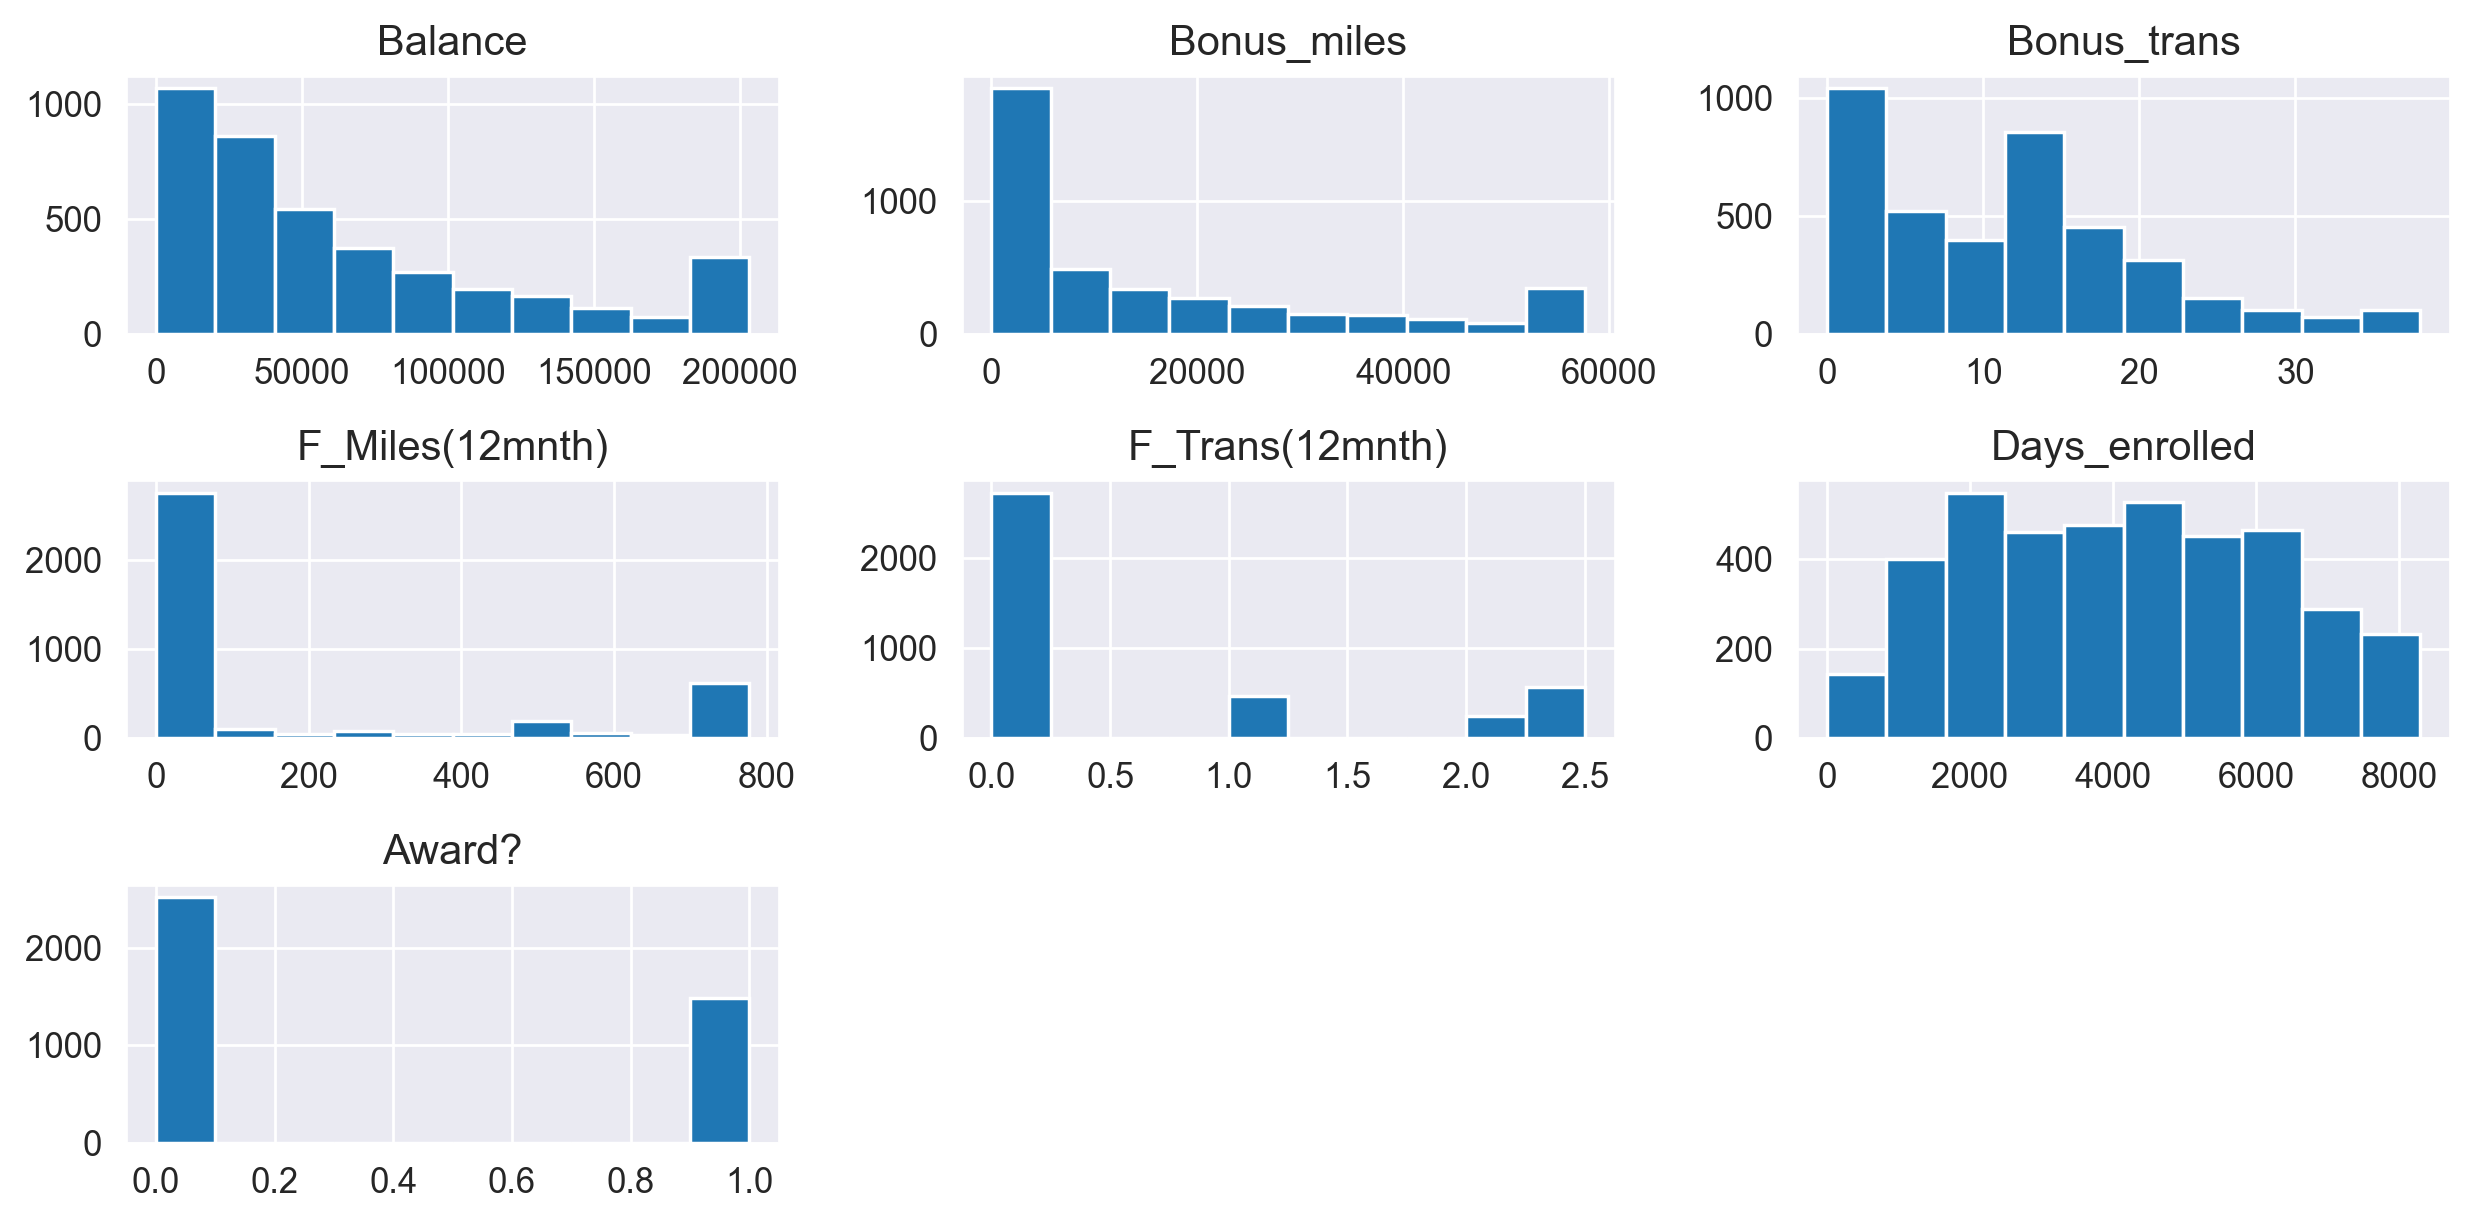

In [24]:
df.hist()
plt.tight_layout()

In [25]:
# Scaling The Data

sc = StandardScaler()

x = sc.fit_transform(df)
x

array([[-0.60725829, -0.8430905 , -1.1488544 , ..., -0.62614341,
         1.39545434, -0.7669193 ],
       [-0.75894657, -0.84082186, -1.03913266, ..., -0.62614341,
         1.37995704, -0.7669193 ],
       [-0.38206963, -0.6245814 , -0.81968917, ..., -0.62614341,
         1.41192021, -0.7669193 ],
       ...,
       [ 0.1675298 ,  0.55533457, -0.38080221, ..., -0.62614341,
        -1.31560393,  1.30391816],
       [-0.15118775, -0.82505202, -1.1488544 , ...,  0.43238439,
        -1.31608822, -0.7669193 ],
       [-1.03556163, -0.8527184 , -1.25857614, ..., -0.62614341,
        -1.31754109, -0.7669193 ]])

# Implementing Clustering Algorithms/Methods

1. Hierarchical Clustering

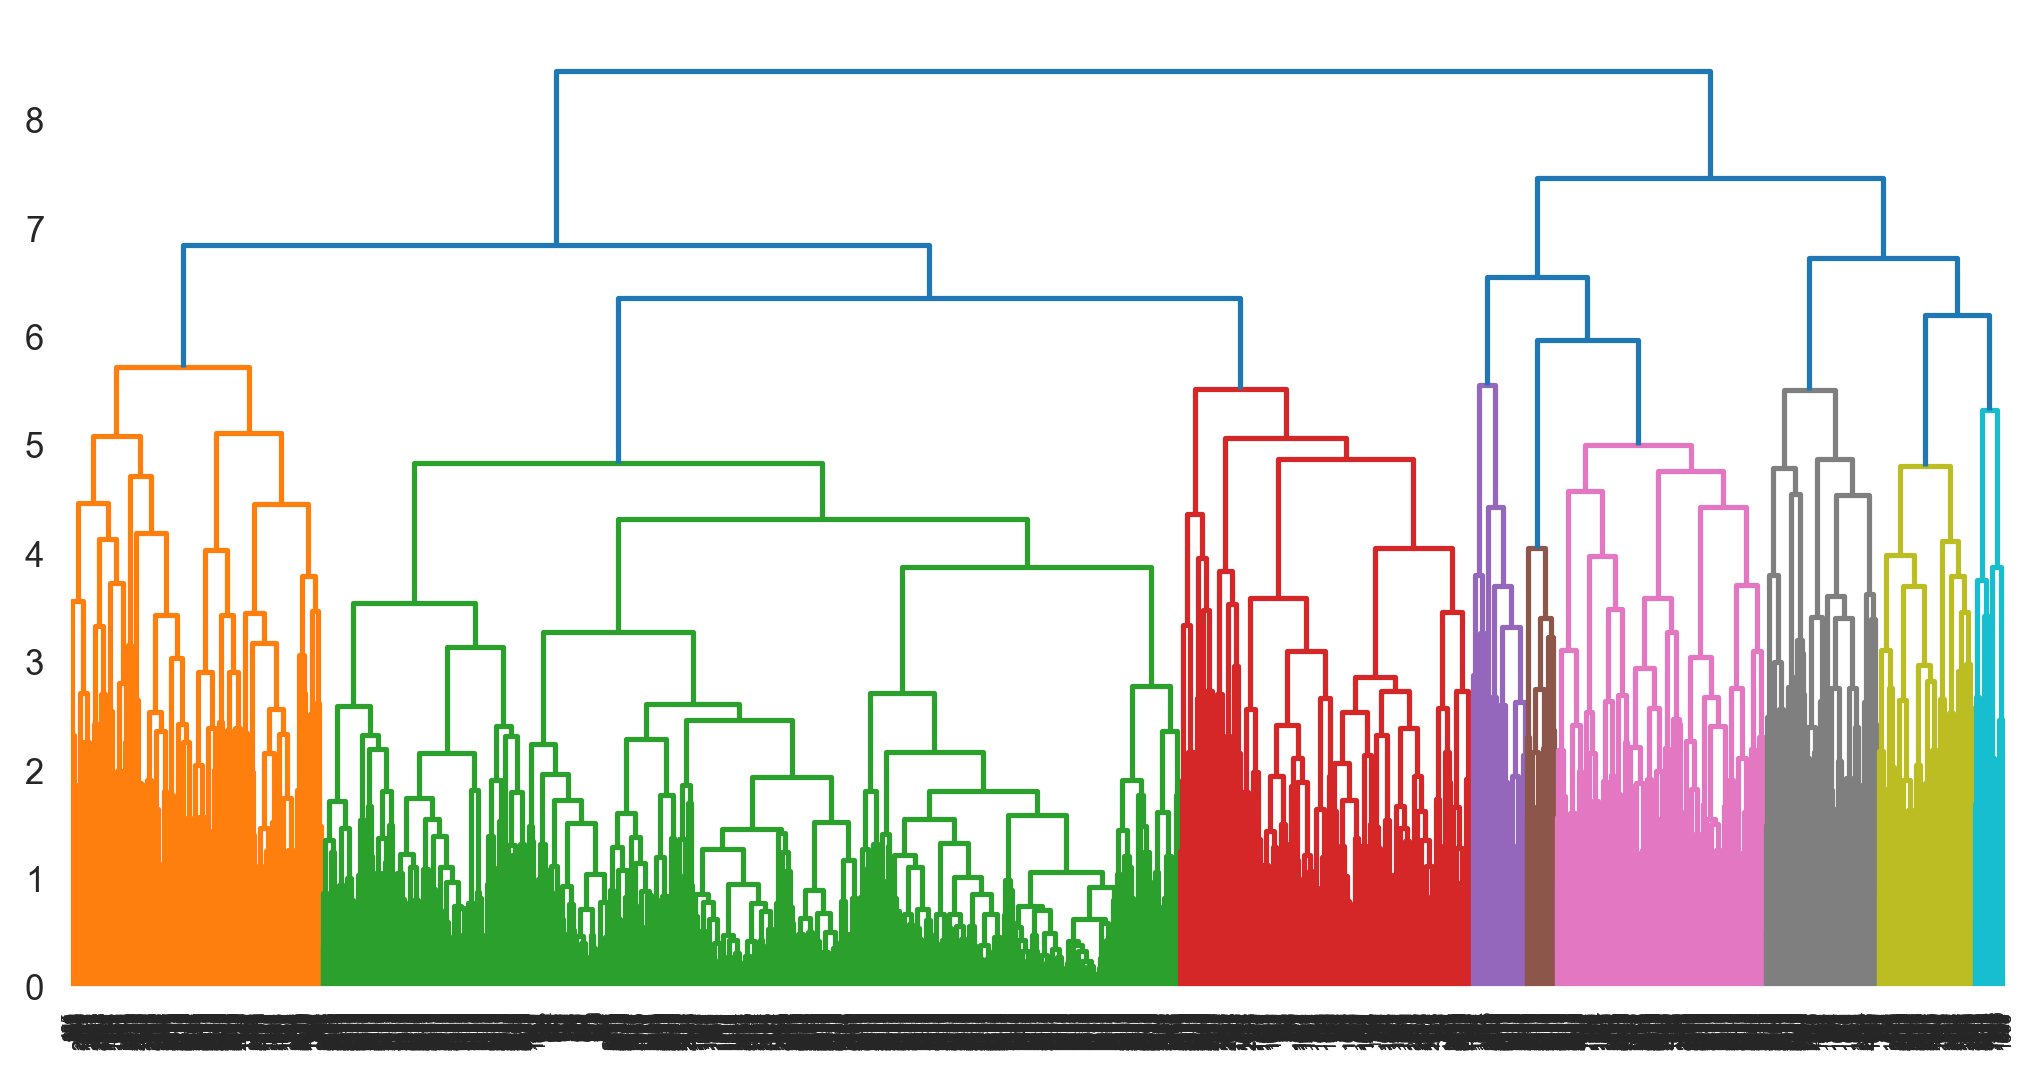

In [27]:
lk = hierarchy.linkage(x, method='complete')
dendrogram = hierarchy.dendrogram(lk)

In [28]:
hc = AgglomerativeClustering(n_clusters=3)

ypred = hc.fit_predict(x)
ypred

array([2, 2, 2, ..., 1, 0, 2], dtype=int64)

In [29]:
df['cluster'] = ypred
df

Balance  Bonus_miles  Bonus_trans  F_Miles(12mnth)  F_Trans(12mnth)  \
0     28143.0        174.0          1.0              0.0              0.0   
1     19244.0        215.0          2.0              0.0              0.0   
2     41354.0       4123.0          4.0              0.0              0.0   
3     14776.0        500.0          1.0              0.0              0.0   
4     97752.0      43300.0         26.0            777.5              2.5   
...       ...          ...          ...              ...              ...   
3994  18476.0       8525.0          4.0            200.0              1.0   
3995  64385.0        981.0          5.0              0.0              0.0   
3996  73597.0      25447.0          8.0              0.0              0.0   
3997  54899.0        500.0          1.0            500.0              1.0   
3998   3016.0          0.0          0.0              0.0              0.0   

      Days_enrolled  Award?  cluster  
0            7000.0     0.0        2  
1            6968.0     0.0        2  
2            7034.0     0.0        2  
3            6952.0     0.0        2  
4            6935.0     1.0        0  
...             ...     ...      ...  
3994         1403.0     1.0        0  
3995         1395.0     1.0        1  
3996         1402.0     1.0        1  
3997         1401.0     0.0        0  
3998         1398.0     0.0        2  

[3999 rows x 8 columns]

In [30]:
df[df['cluster'] == 0]

Balance  Bonus_miles  Bonus_trans  F_Miles(12mnth)  F_Trans(12mnth)  \
4      97752.00      43300.0         26.0            777.5              2.5   
7      20856.00       5250.0          4.0            250.0              1.0   
8     203218.75       1753.0         38.0            777.5              2.5   
9     104860.00      28426.0         28.0            777.5              2.5   
21    185681.00      13300.0         16.0            777.5              2.5   
...         ...          ...          ...              ...              ...   
3979   57793.00      20959.0         15.0            777.5              2.5   
3986   34235.00      18910.0          7.0            250.0              1.0   
3987   11933.00        249.0          3.0             79.0              1.0   
3994   18476.00       8525.0          4.0            200.0              1.0   
3997   54899.00        500.0          1.0            500.0              1.0   

      Days_enrolled  Award?  cluster  
4            6935.0     1.0        0  
7            6938.0     1.0        0  
8            6948.0     1.0        0  
9            6931.0     1.0        0  
21           6896.0     1.0        0  
...             ...     ...      ...  
3979         1424.0     1.0        0  
3986         1415.0     0.0        0  
3987         1412.0     1.0        0  
3994         1403.0     1.0        0  
3997         1401.0     0.0        0  

[1080 rows x 8 columns]

In [31]:
df.groupby('cluster').agg('mean')

Balance   Bonus_miles  Bonus_trans  F_Miles(12mnth)  \
cluster                                                             
0        86480.164815  18609.132407    14.822222       608.448611   
1        85594.873301  26384.574740    14.380496        40.944045   
2        32693.651079   5109.440048     7.118106         2.217626   

         F_Trans(12mnth)  Days_enrolled    Award?  
cluster                                            
0               1.979167    4247.545370  0.537037  
1               0.165468    4856.238209  0.720224  
2               0.012590    3481.784173  0.000000

<Axes: xlabel='F_Miles(12mnth)', ylabel='F_Trans(12mnth)'>

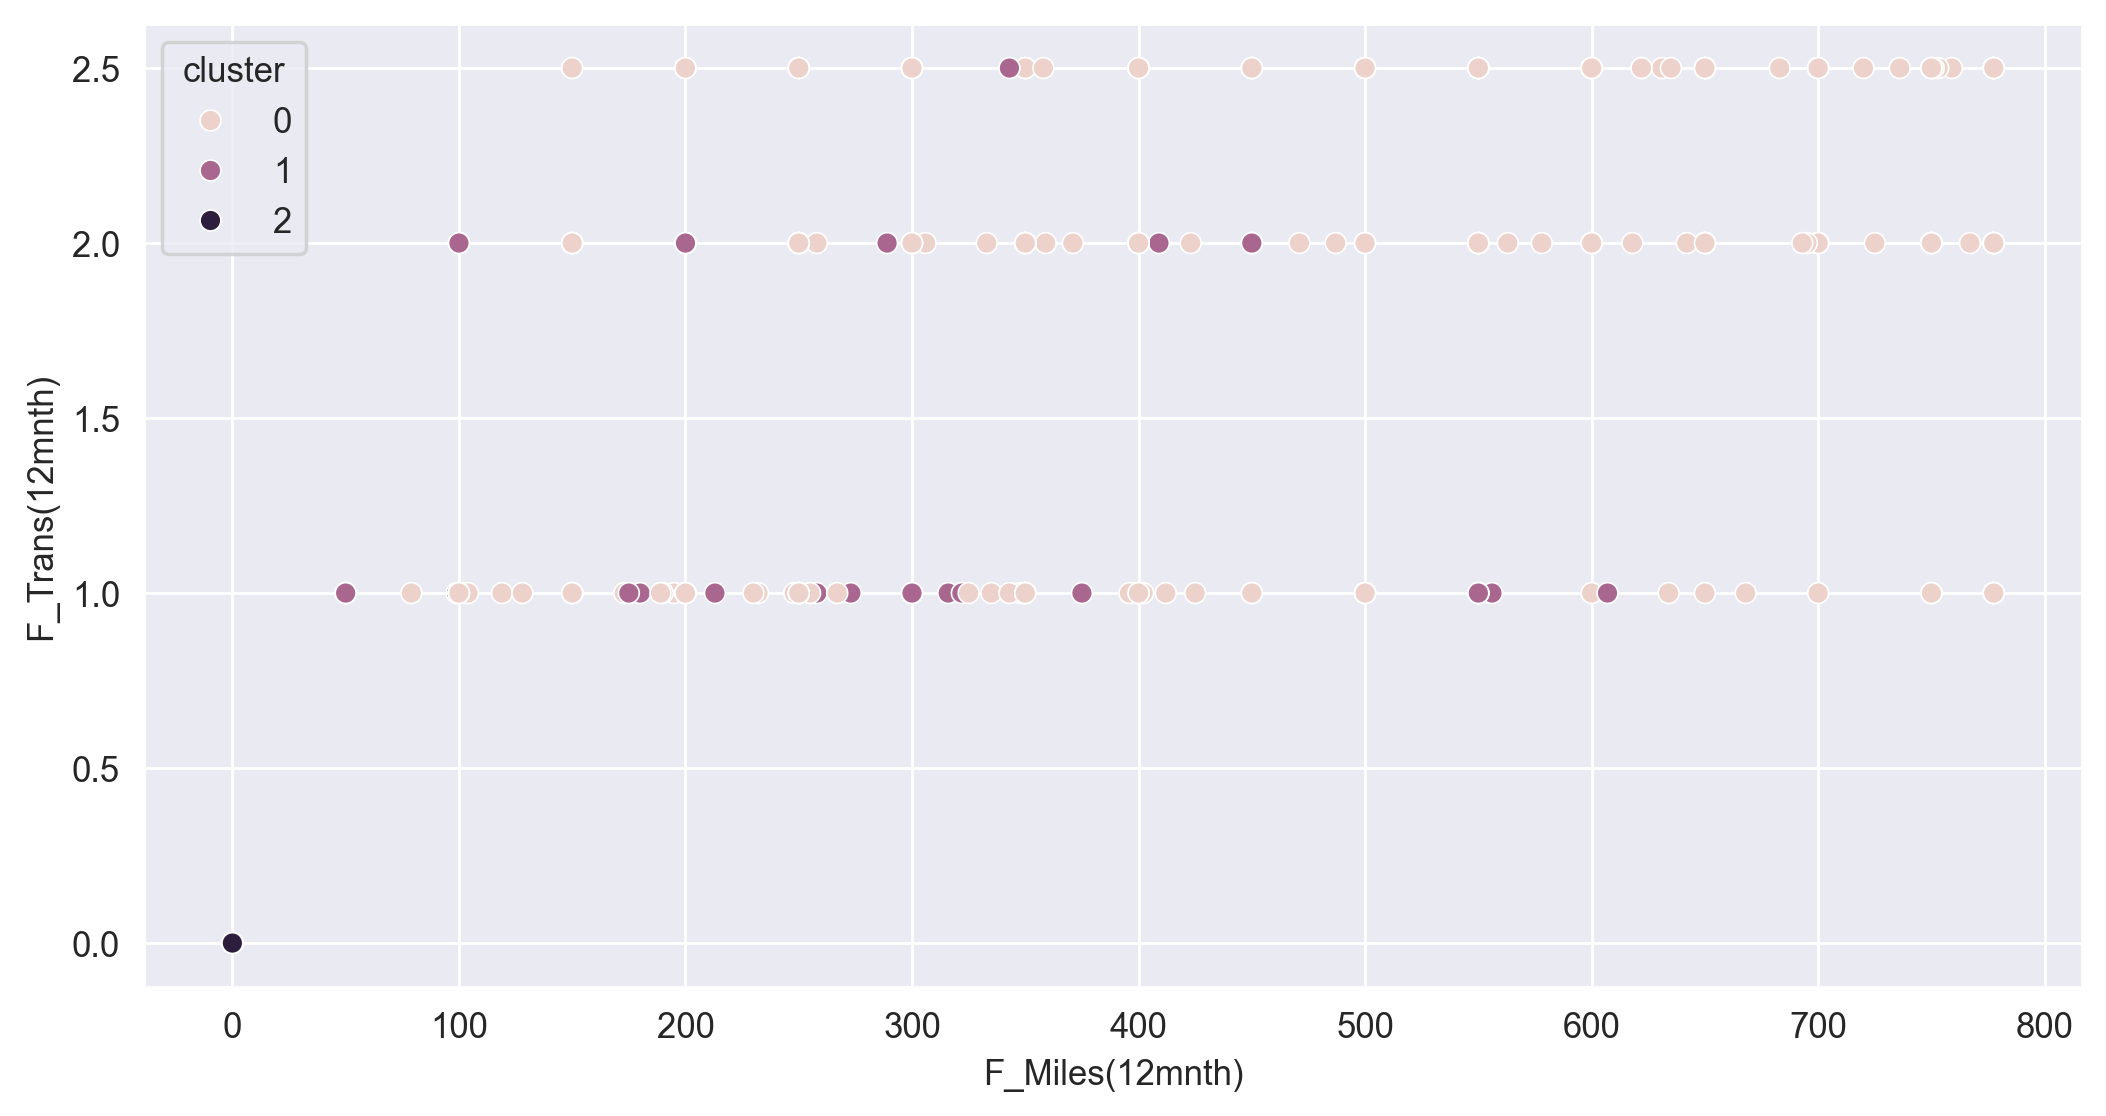

In [32]:
sns.scatterplot(x = df['F_Miles(12mnth)'], y = df['F_Trans(12mnth)'], hue = df['cluster'])

<Axes: xlabel='Bonus_miles', ylabel='Bonus_trans'>

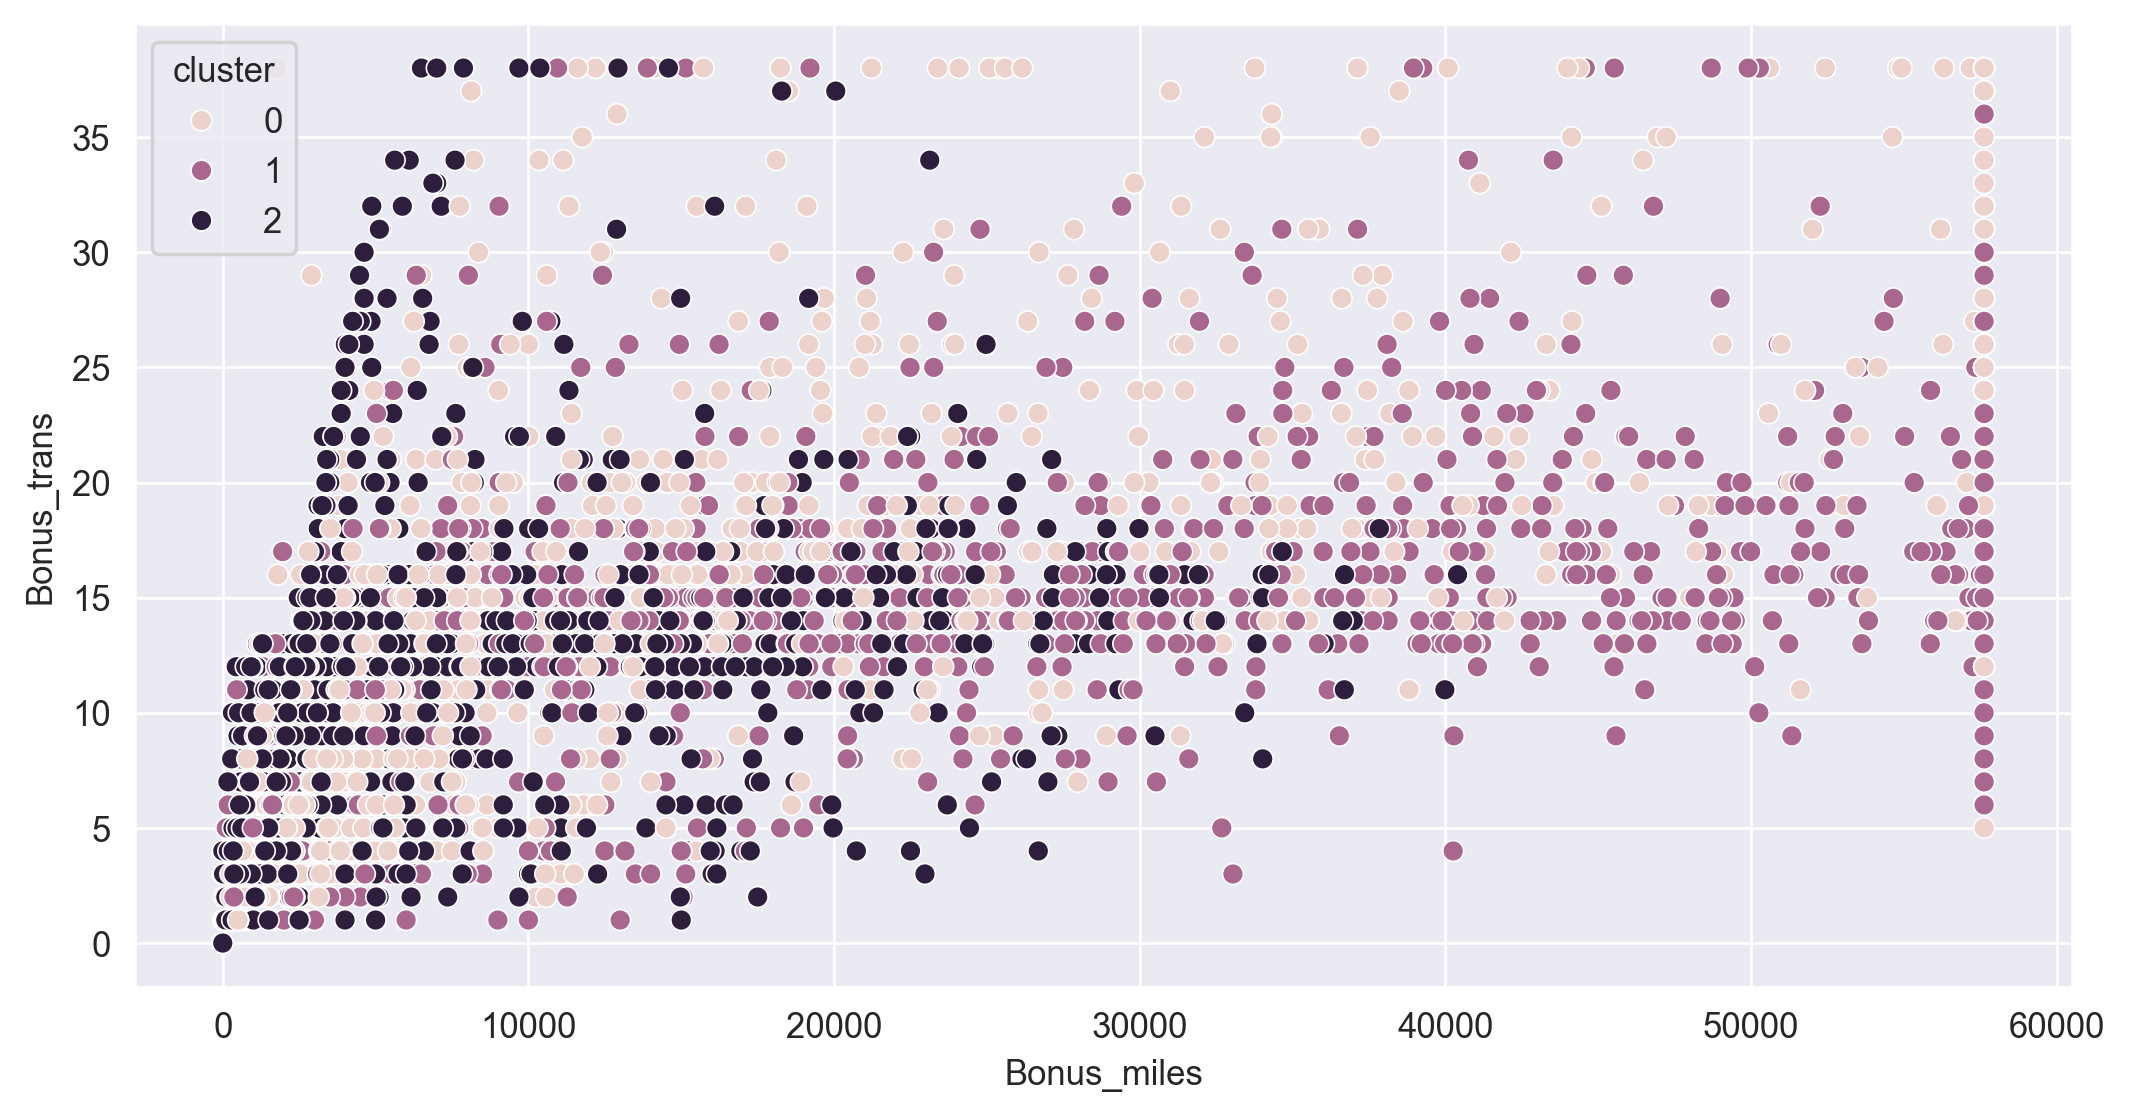

In [33]:
sns.scatterplot(x = df['Bonus_miles'], y = df['Bonus_trans'], hue = df['cluster'])

In [34]:
# Evaluate silhouette score
silhouette_hierarchical = silhouette_score(x, ypred)
print(f'Silhouette Score for Hierarchical Clustering: {silhouette_hierarchical}')

Silhouette Score for Hierarchical Clustering: 0.2462503176311667


2. K-Means Clustering Method

In [36]:
km = KMeans()
yp = km.fit_predict(x)
yp

array([5, 5, 5, ..., 6, 3, 4])

In [37]:
km.cluster_centers_

array([[ 0.51200124,  0.16719844,  0.51099487, -0.51898971, -0.51096681,
         0.12284594, -0.76334272],
       [ 1.03273974,  1.80616817,  0.80912582, -0.4139887 , -0.40185587,
         0.5304727 ,  0.64574501],
       [ 0.78426051,  1.64759533,  1.68783698,  1.70480522,  1.68475088,
         0.3761462 ,  1.04671223],
       [-0.27976755, -0.4942291 , -0.26357592,  1.57555654,  1.59951115,
        -0.28752942, -0.04896386],
       [-0.67989769, -0.69452135, -0.69567317, -0.56371699, -0.56868412,
        -1.06936586, -0.7669193 ],
       [-0.57372879, -0.71809953, -0.77776298, -0.55142291, -0.55557489,
         0.71979584, -0.7669193 ],
       [-0.42301272, -0.11224163, -0.05337035, -0.46334892, -0.46895287,
         0.070118  ,  1.30391816],
       [ 1.65362423, -0.06948813,  0.28256134,  1.63812017,  1.62444207,
         0.58177519,  0.76246066]])

In [38]:
x

array([[-0.60725829, -0.8430905 , -1.1488544 , ..., -0.62614341,
         1.39545434, -0.7669193 ],
       [-0.75894657, -0.84082186, -1.03913266, ..., -0.62614341,
         1.37995704, -0.7669193 ],
       [-0.38206963, -0.6245814 , -0.81968917, ..., -0.62614341,
         1.41192021, -0.7669193 ],
       ...,
       [ 0.1675298 ,  0.55533457, -0.38080221, ..., -0.62614341,
        -1.31560393,  1.30391816],
       [-0.15118775, -0.82505202, -1.1488544 , ...,  0.43238439,
        -1.31608822, -0.7669193 ],
       [-1.03556163, -0.8527184 , -1.25857614, ..., -0.62614341,
        -1.31754109, -0.7669193 ]])

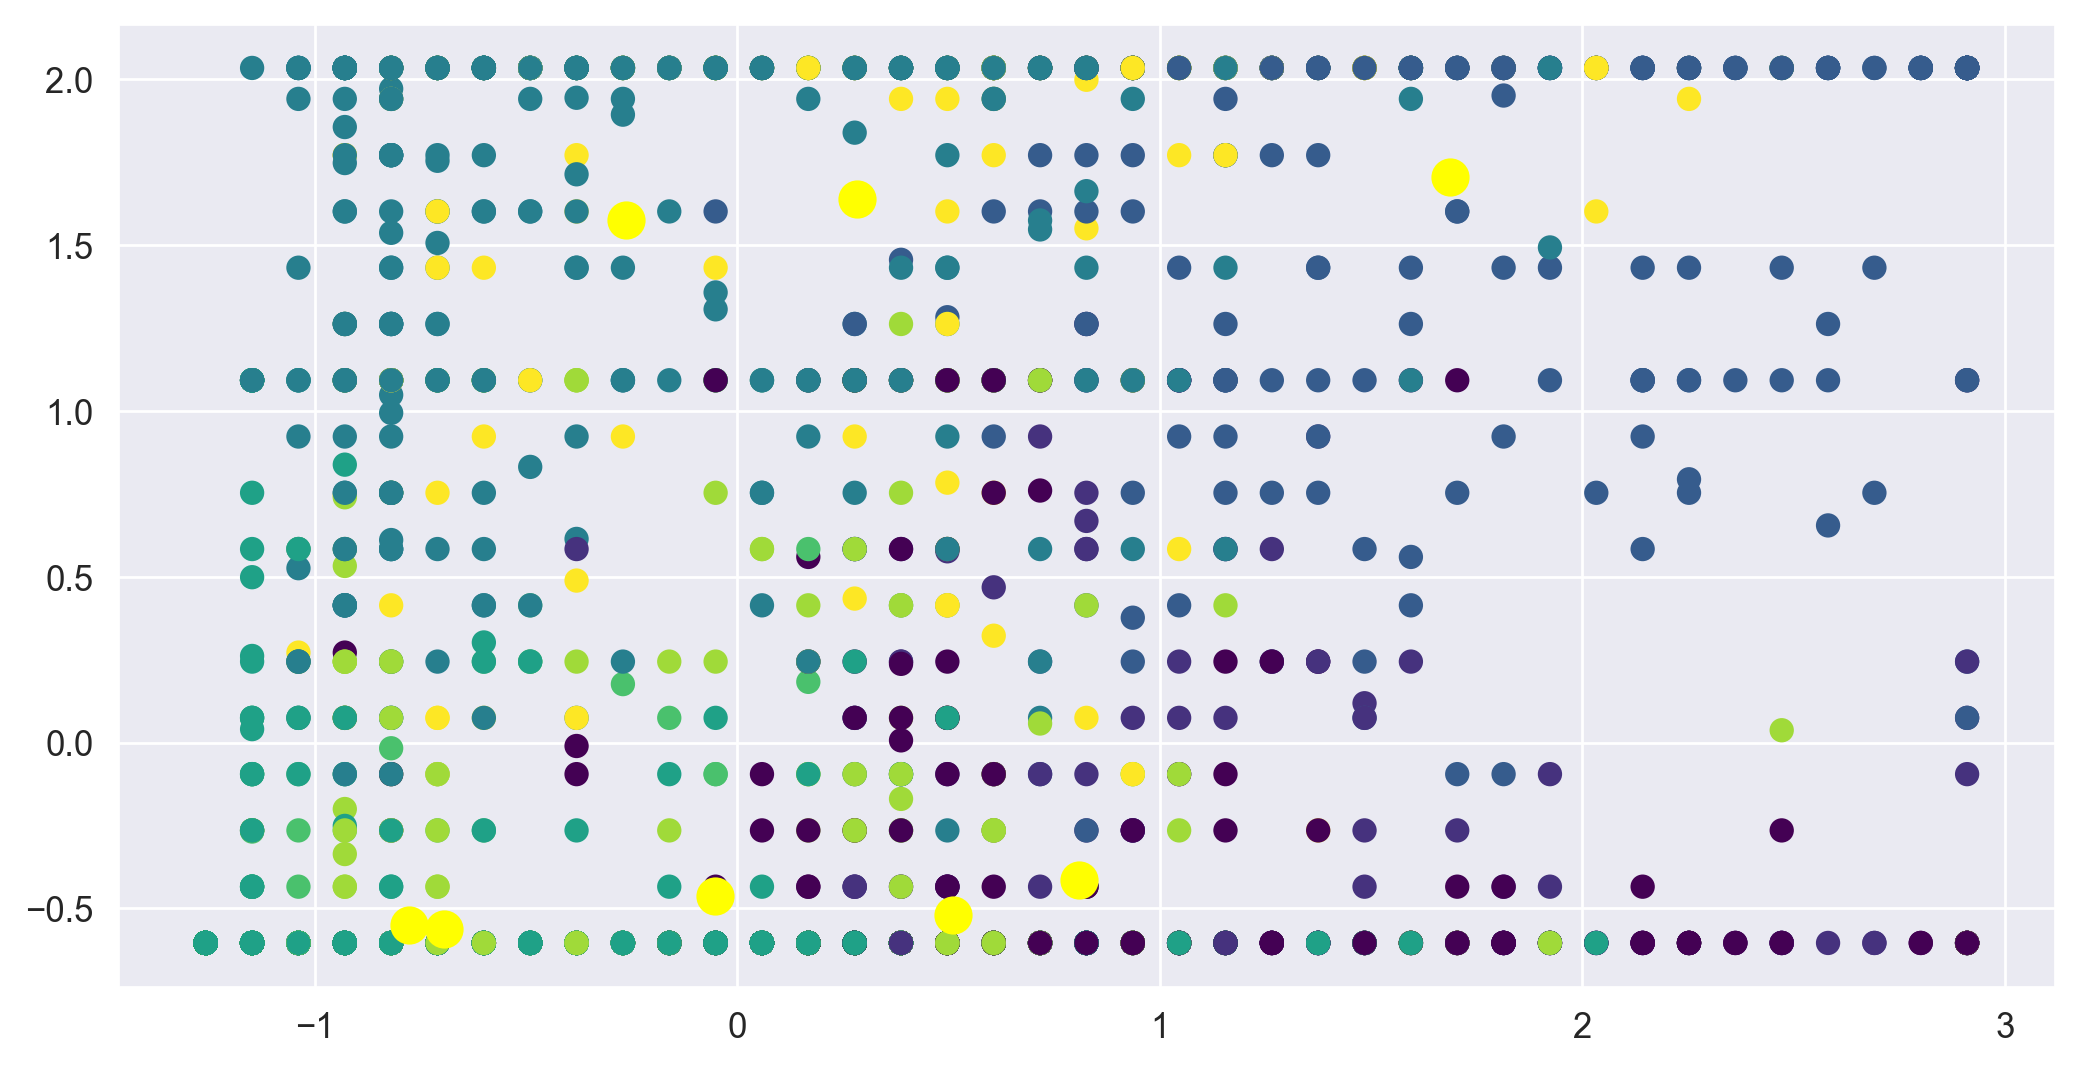

In [39]:
plt.scatter(x[:,2],x[:,3], c = yp, cmap='viridis')
plt.scatter(km.cluster_centers_[:,2],km.cluster_centers_[:,3], c = 'yellow', s = 100)

In [40]:
wcss = []

for i in range(1,11):
    km = KMeans(n_clusters=i)
    km.fit_predict(x)
    wcss.append(km.inertia_)

In [41]:
wcss

[27993.00000000003,
 19646.401792443547,
 15681.074221946204,
 13956.287239414043,
 12860.897496065141,
 10968.984229045116,
 10453.55809077885,
 9573.121032077073,
 8819.232280968305,
 8703.922744468819]

Text(0.5, 1.0, 'Elbow Graph')

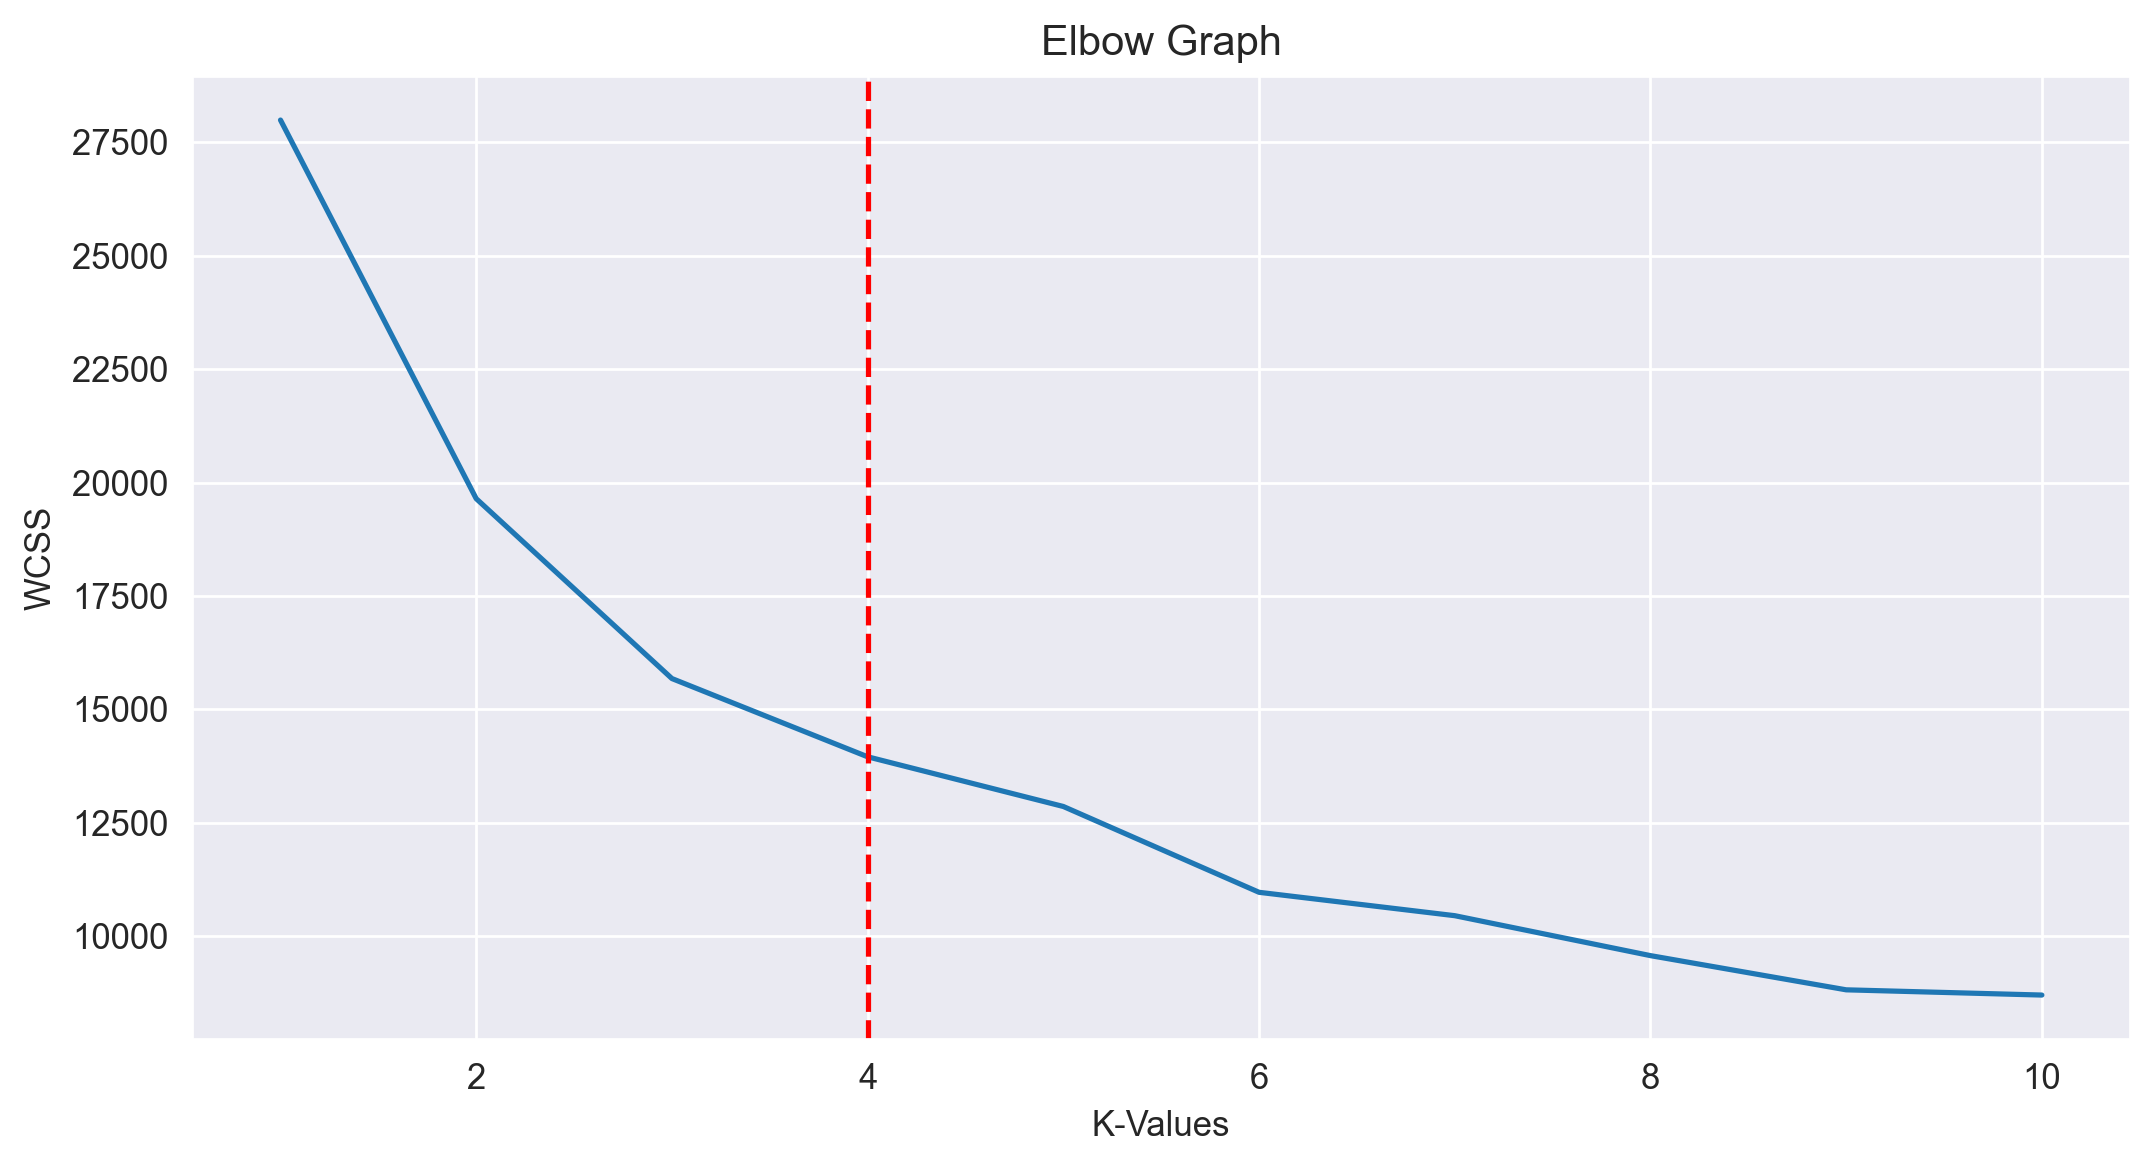

In [42]:
plt.plot(range(1,11),wcss)
plt.axvline(x = 4, linestyle = '--', color = 'red')
plt.xlabel('K-Values')
plt.ylabel('WCSS')
plt.title('Elbow Graph')

In [43]:
km = KMeans(n_clusters=4)
ypredkm = km.fit_predict(x)
ypredkm

array([2, 2, 2, ..., 3, 2, 2])

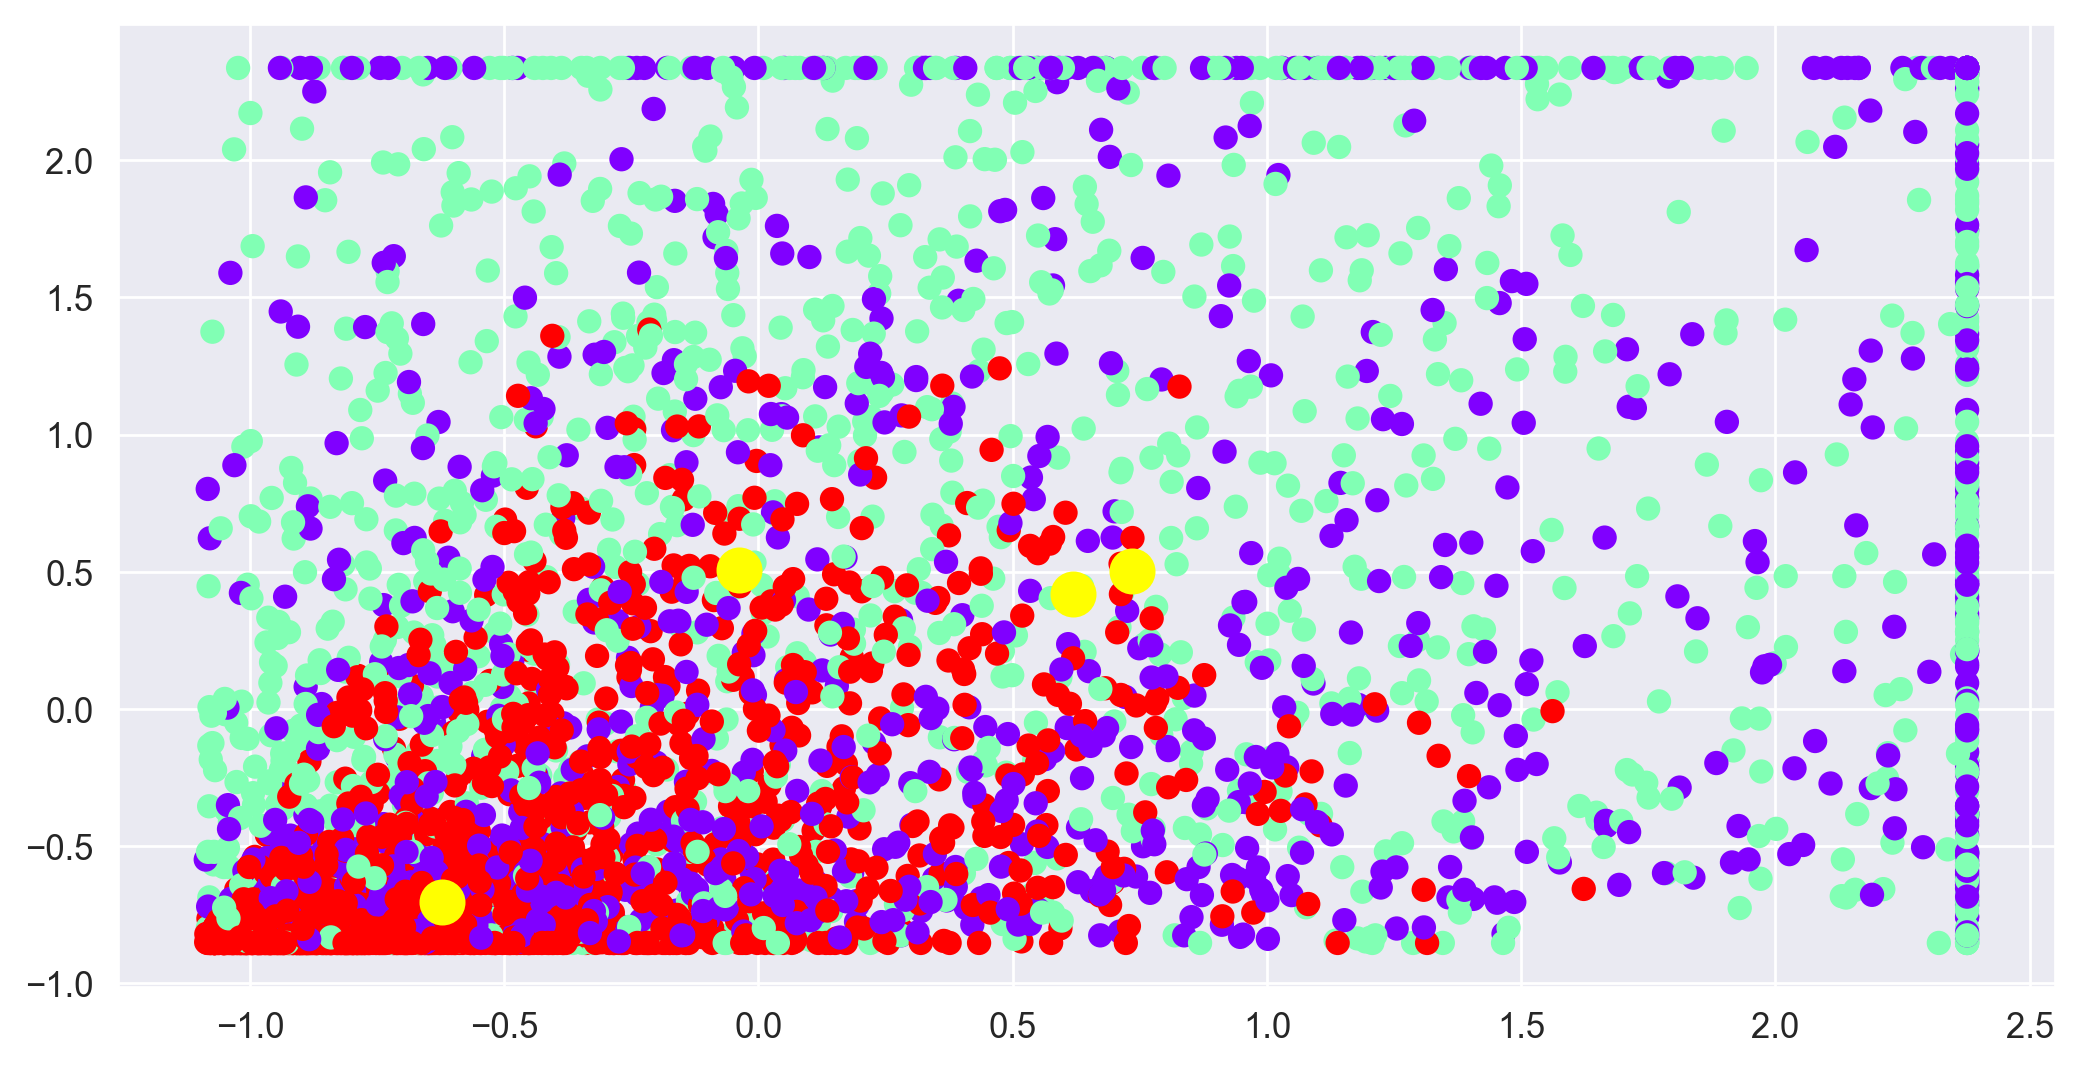

In [44]:
plt.scatter(x[:,0],x[:,1], c = ypred, cmap='rainbow')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1], c = 'yellow', s = 150)

In [46]:
df['cluster2'] = ypredkm
df

Balance  Bonus_miles  Bonus_trans  F_Miles(12mnth)  F_Trans(12mnth)  \
0     28143.0        174.0          1.0              0.0              0.0   
1     19244.0        215.0          2.0              0.0              0.0   
2     41354.0       4123.0          4.0              0.0              0.0   
3     14776.0        500.0          1.0              0.0              0.0   
4     97752.0      43300.0         26.0            777.5              2.5   
...       ...          ...          ...              ...              ...   
3994  18476.0       8525.0          4.0            200.0              1.0   
3995  64385.0        981.0          5.0              0.0              0.0   
3996  73597.0      25447.0          8.0              0.0              0.0   
3997  54899.0        500.0          1.0            500.0              1.0   
3998   3016.0          0.0          0.0              0.0              0.0   

      Days_enrolled  Award?  cluster  cluster2  
0            7000.0     0.0        2         2  
1            6968.0     0.0        2         2  
2            7034.0     0.0        2         2  
3            6952.0     0.0        2         2  
4            6935.0     1.0        0         0  
...             ...     ...      ...       ...  
3994         1403.0     1.0        0         2  
3995         1395.0     1.0        1         2  
3996         1402.0     1.0        1         3  
3997         1401.0     0.0        0         2  
3998         1398.0     0.0        2         2  

[3999 rows x 9 columns]

In [87]:
df.groupby('cluster2').agg('mean')

Balance   Bonus_miles  Bonus_trans  F_Miles(12mnth)  \
cluster2                                                              
0         100114.961353  22953.607790    17.229469       694.143116   
1         106854.592606  24465.822887    16.445070        53.278873   
2          27275.596142   2696.358432     4.883012        35.474798   
3          61378.153103  24494.312061    14.147541        49.716628   

          F_Trans(12mnth)  Days_enrolled    Award?   cluster  
cluster2                                                      
0                2.252415    4526.286232  0.676329  0.073671  
1                0.166197    4747.954930  0.000000  1.274648  
2                0.135968    3306.705040  0.041693  1.762912  
3                0.192037    4727.670960  1.000000  0.922717

In [89]:
df['cluster'].value_counts()

cluster
2    1668
1    1251
0    1080
Name: count, dtype: int64

In [91]:
df['cluster2'].value_counts()

cluster2
2    1607
3     854
0     828
1     710
Name: count, dtype: int64

In [45]:
silhouette_score(x, ypredkm)

0.2672657909194923

3. DBSCAN Method

In [100]:
db = DBSCAN(eps=0.7, min_samples=4)

yDBS = db.fit_predict(x)
yDBS

array([0, 0, 0, ..., 2, 9, 0], dtype=int64)

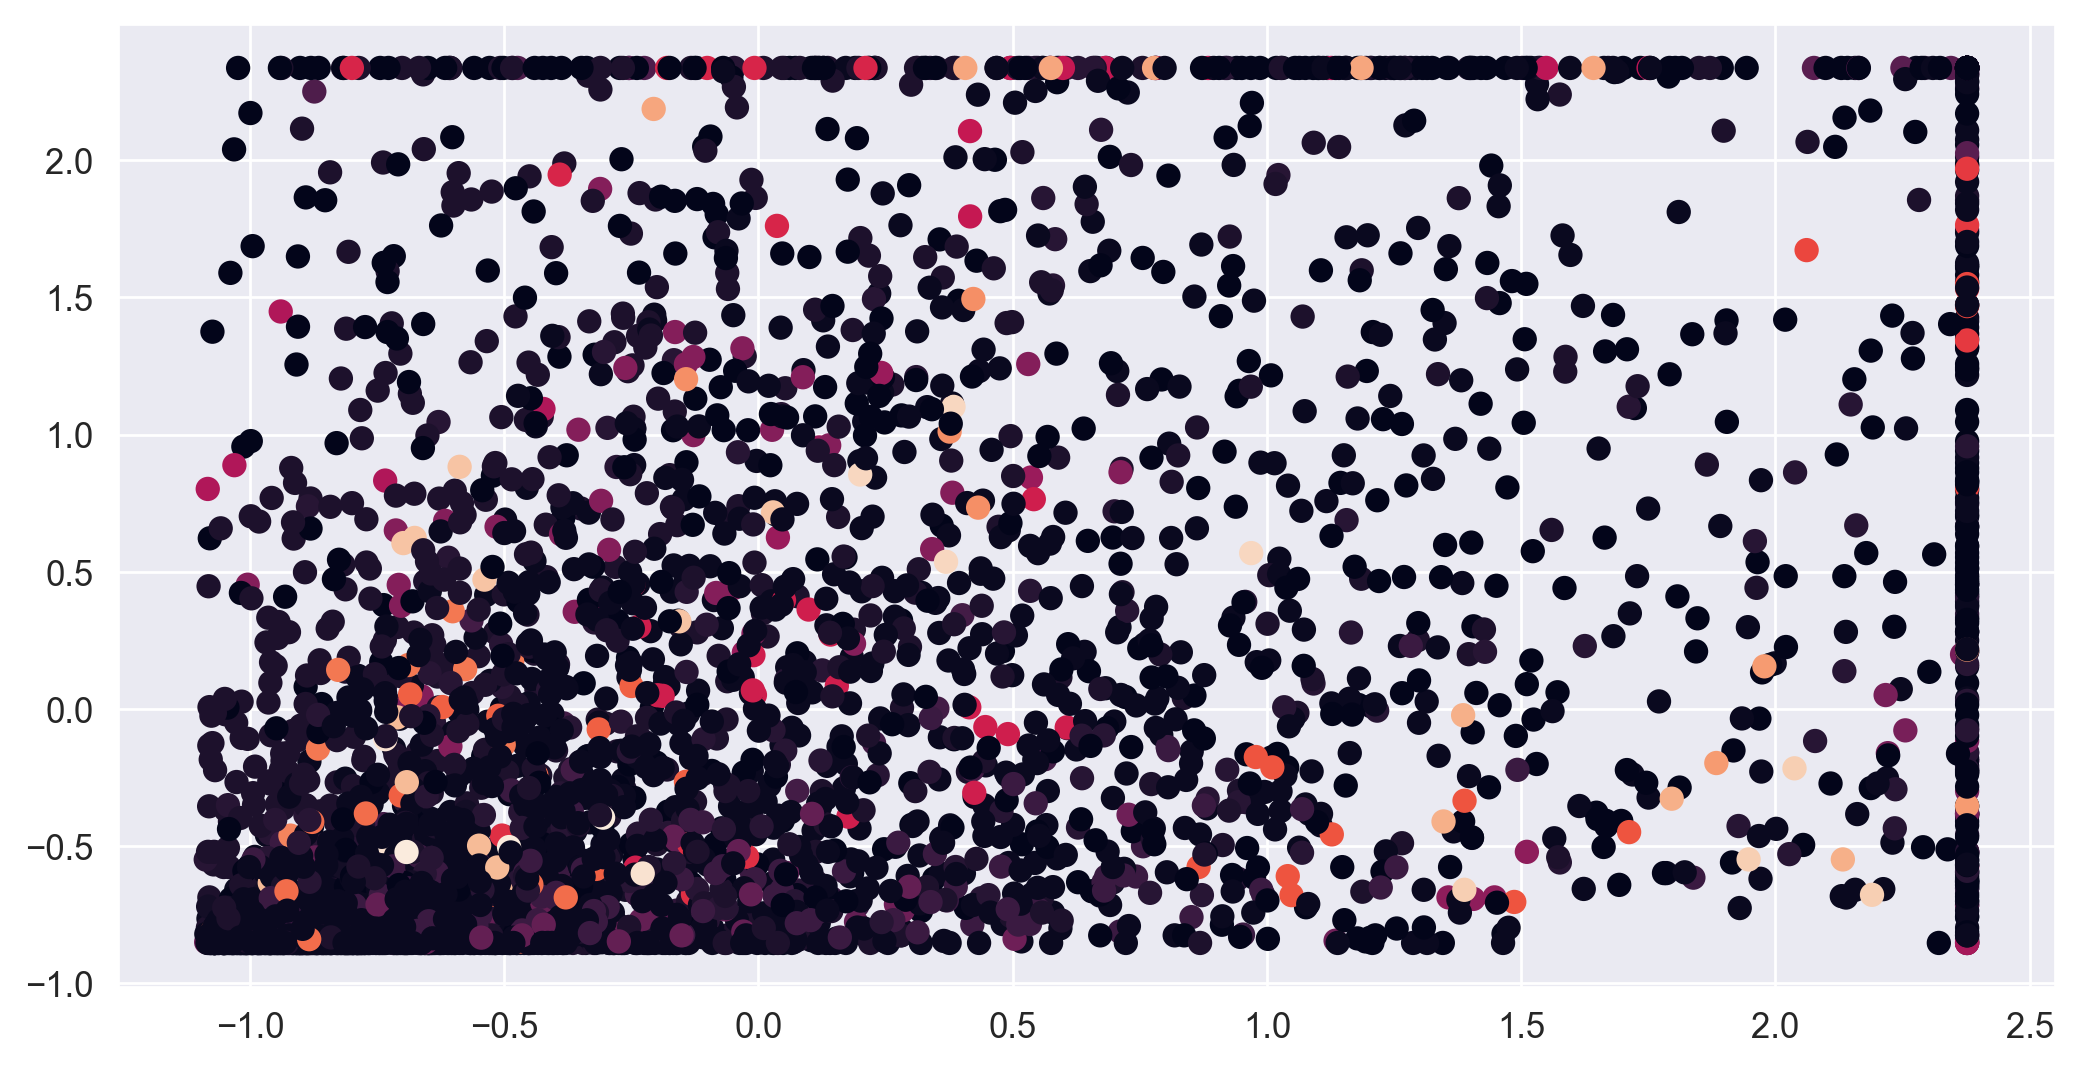

In [104]:
plt.scatter(x[:,0],x[:,1],c = yDBS)

In [106]:
silhouette_score(x, yDBS)

-0.20244074196572903